In [2]:
## Import Libraries
install.packages("reshape2")
install.packages("MASS")
install.packages("car")
install.packages("e1071")
install.packages("forecast")
install.packages("goftest")
install.packages("lmtest")

library(haven)
library(ggplot2)
library(reshape2)
library(MASS)
library(car)
library(faraway)
library(e1071)
library(dplyr)
library(MASS)
library(corrplot)
library(forecast)
library(goftest)
library(lmtest)


The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages

The downloaded binary packages are in
	/var/folders/5m/0jfggm0n5q39rqpgq1kr1wk00000gn/T//RtmpRzvqdQ/downloaded_packages


Loading required package: carData


Attaching package: ‘faraway’


The following objects are masked from ‘package:car’:

    logit, vif



Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [4]:
## Read Data
file_path <- "file5-boston_data.dta"
data <- read_dta(file_path)
attach(data)

The following objects are masked from data (pos = 3):

    admissions, admitrate, admitratecu, admitratesq, countyid, crime1,
    crime2, crime3, crime4, crime5, crime6, crime7, cycle, cyclerate,
    disadvantage, highcrime95, highcrime99, lpop, medinc, nonviolent,
    nonviolentrate, pid, pop, povertyrate, qd1, qd2, qd3, qd4, quarter,
    release, releaserate, releaseratesq, resmobility, shareblack,
    sharesingleparent, state, time, totalcrime, totalcrimerate, tract,
    unemprate, violent, violentrate, year




In [5]:
dimensions <- dim(data)
cat("Rows Cols:", dimensions, "\n")

Rows Cols: 6862 44 


In [6]:
filtered_data <- data %>% filter(year >= 2008)
filtered_data <- filtered_data[, c("tract","totalcrimerate", "cyclerate", "sharesingleparent", "povertyrate", "unemprate", "resmobility", "pop", "medinc", "year")]

In [7]:
averaged_data <- filtered_data %>%
  group_by(tract) %>%
  summarise(
    totalcrimerate = mean(totalcrimerate),
    cyclerate = mean(cyclerate),
    sharesingleparent = mean(sharesingleparent),
    povertyrate = mean(povertyrate),
    unemprate = mean(unemprate),
    resmobility = mean(resmobility),
    pop = mean(pop),
    medinc = mean(medinc),
    year = mean(year)
  )

In [8]:
# List of columns to be dropped
columns_to_drop <- c("tract", "year")

# Drop specified columns
reduced_data <- averaged_data %>%select(-one_of(columns_to_drop))

In [9]:
head(reduced_data)

totalcrimerate,cyclerate,sharesingleparent,povertyrate,unemprate,resmobility,pop,medinc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.487735,0.16801075,0.06850192,0.13463986,0.04443539,0.5015991,3968,44630
3.966212,0.23582882,0.05548387,0.08696774,0.02238806,0.6075782,3887,62305
3.864119,0.27600850,0.09571620,0.12193877,0.02715725,0.4332704,3925,56803
3.794564,0.20590658,0.05867127,0.08985399,0.01617735,0.6056285,2833,56321
3.568292,0.10979358,0.06957187,0.05566535,0.03502130,0.5350404,3036,64750
3.223699,0.08520791,0.01765105,0.21745057,0.02197442,0.6601261,5868,30714


In [10]:
colnames(reduced_data)

[1] "totalcrimerate"    "cyclerate"         "sharesingleparent"
[4] "povertyrate"       "unemprate"         "resmobility"      
[7] "pop"               "medinc"

# EDA

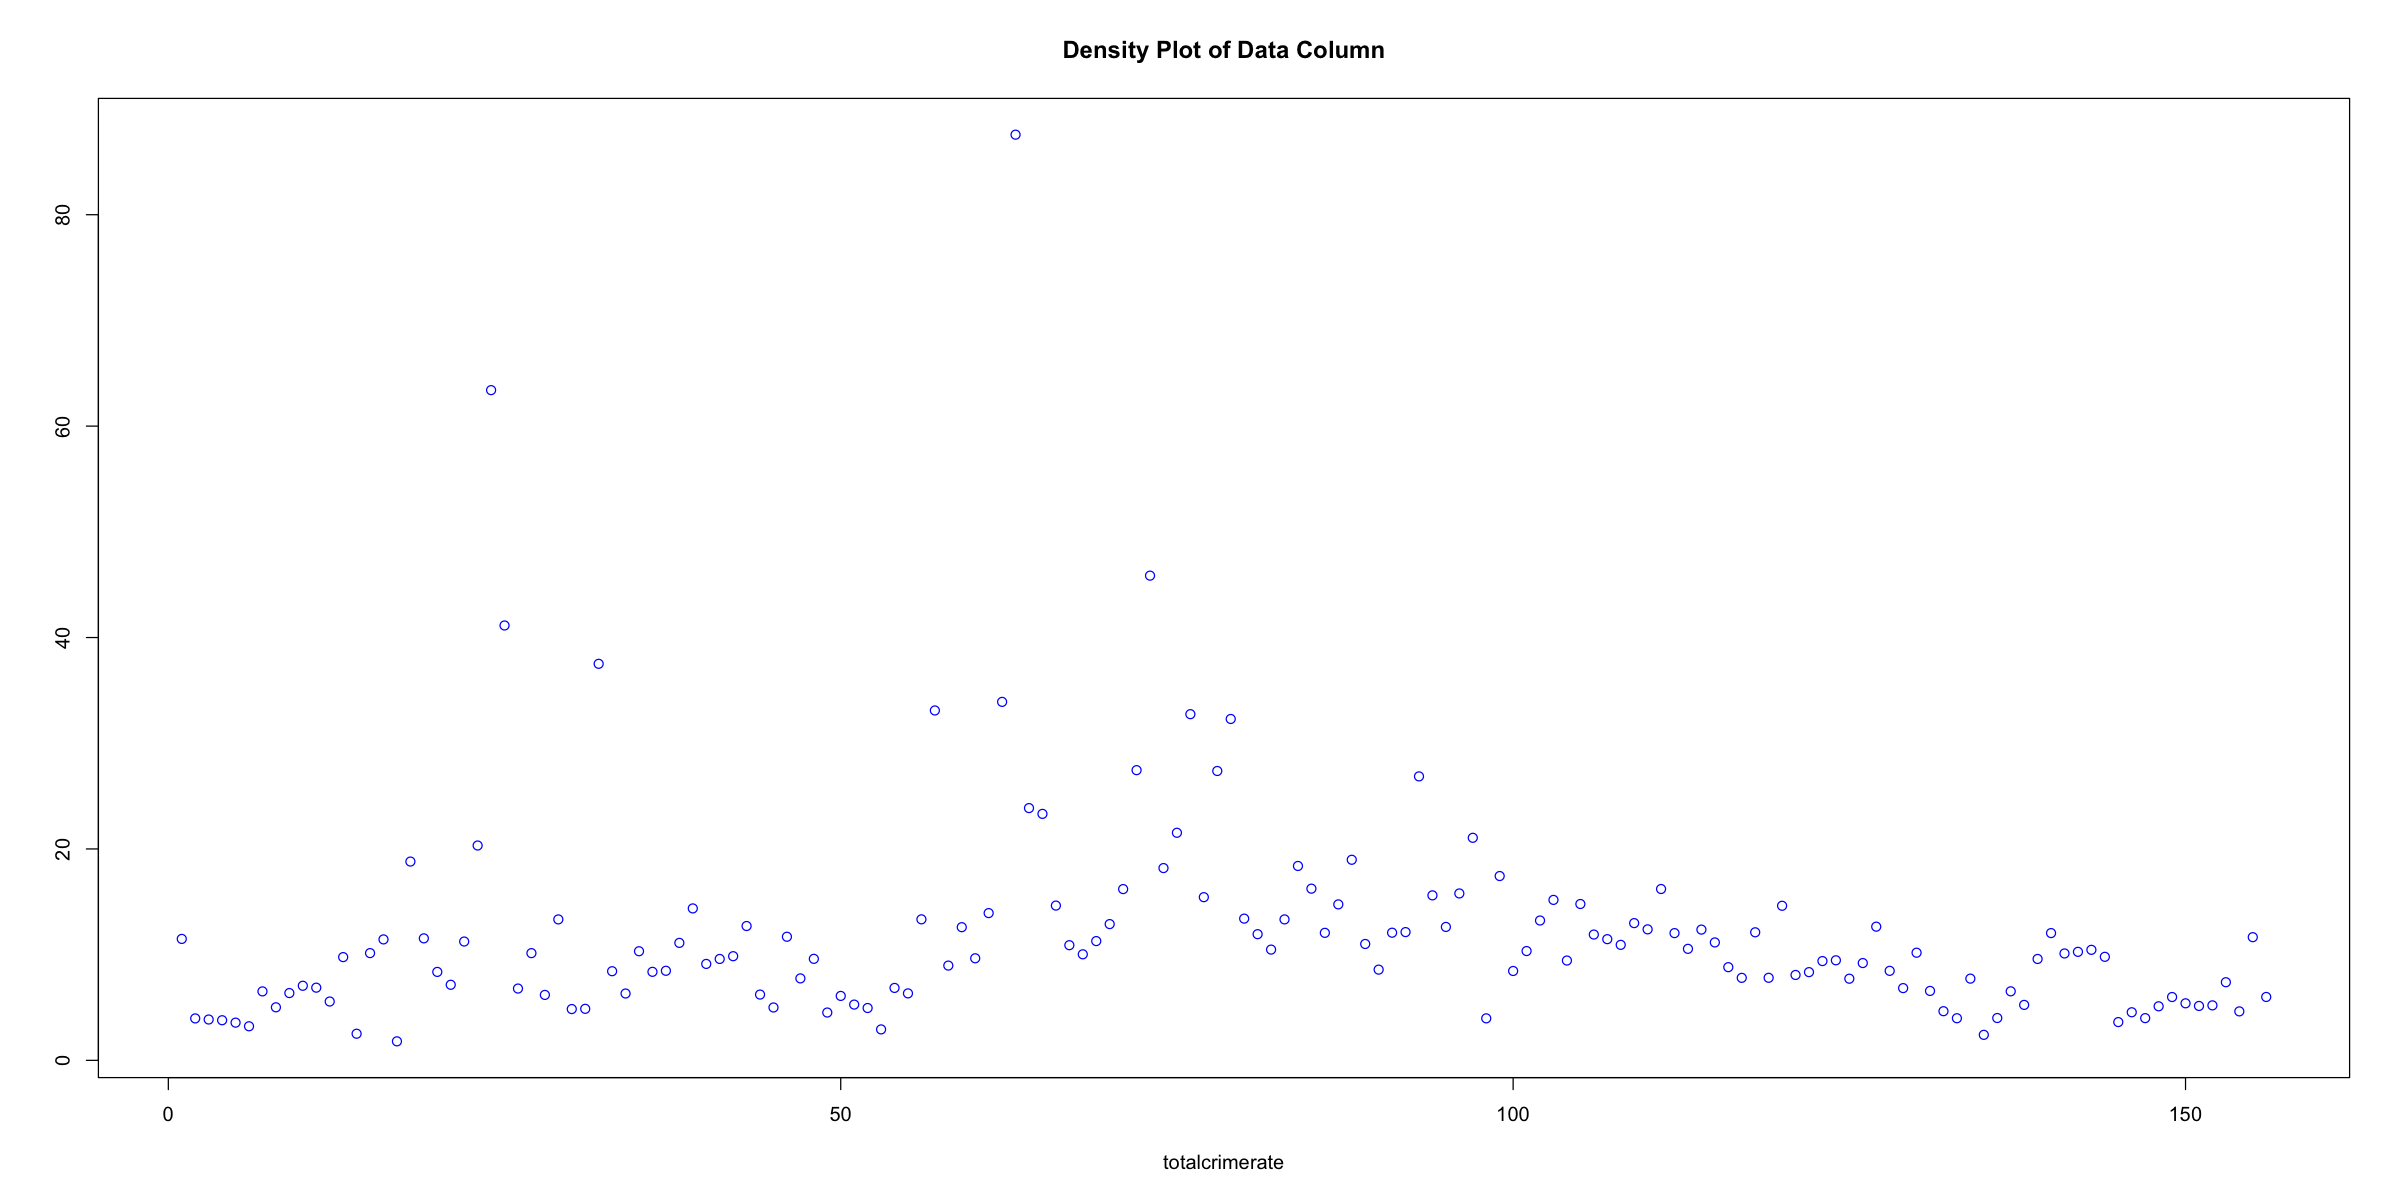

totalcrimerate > 30 is  9 
totalcrimerate > 40 is  4 
totalcrimerate > 30 is  1 


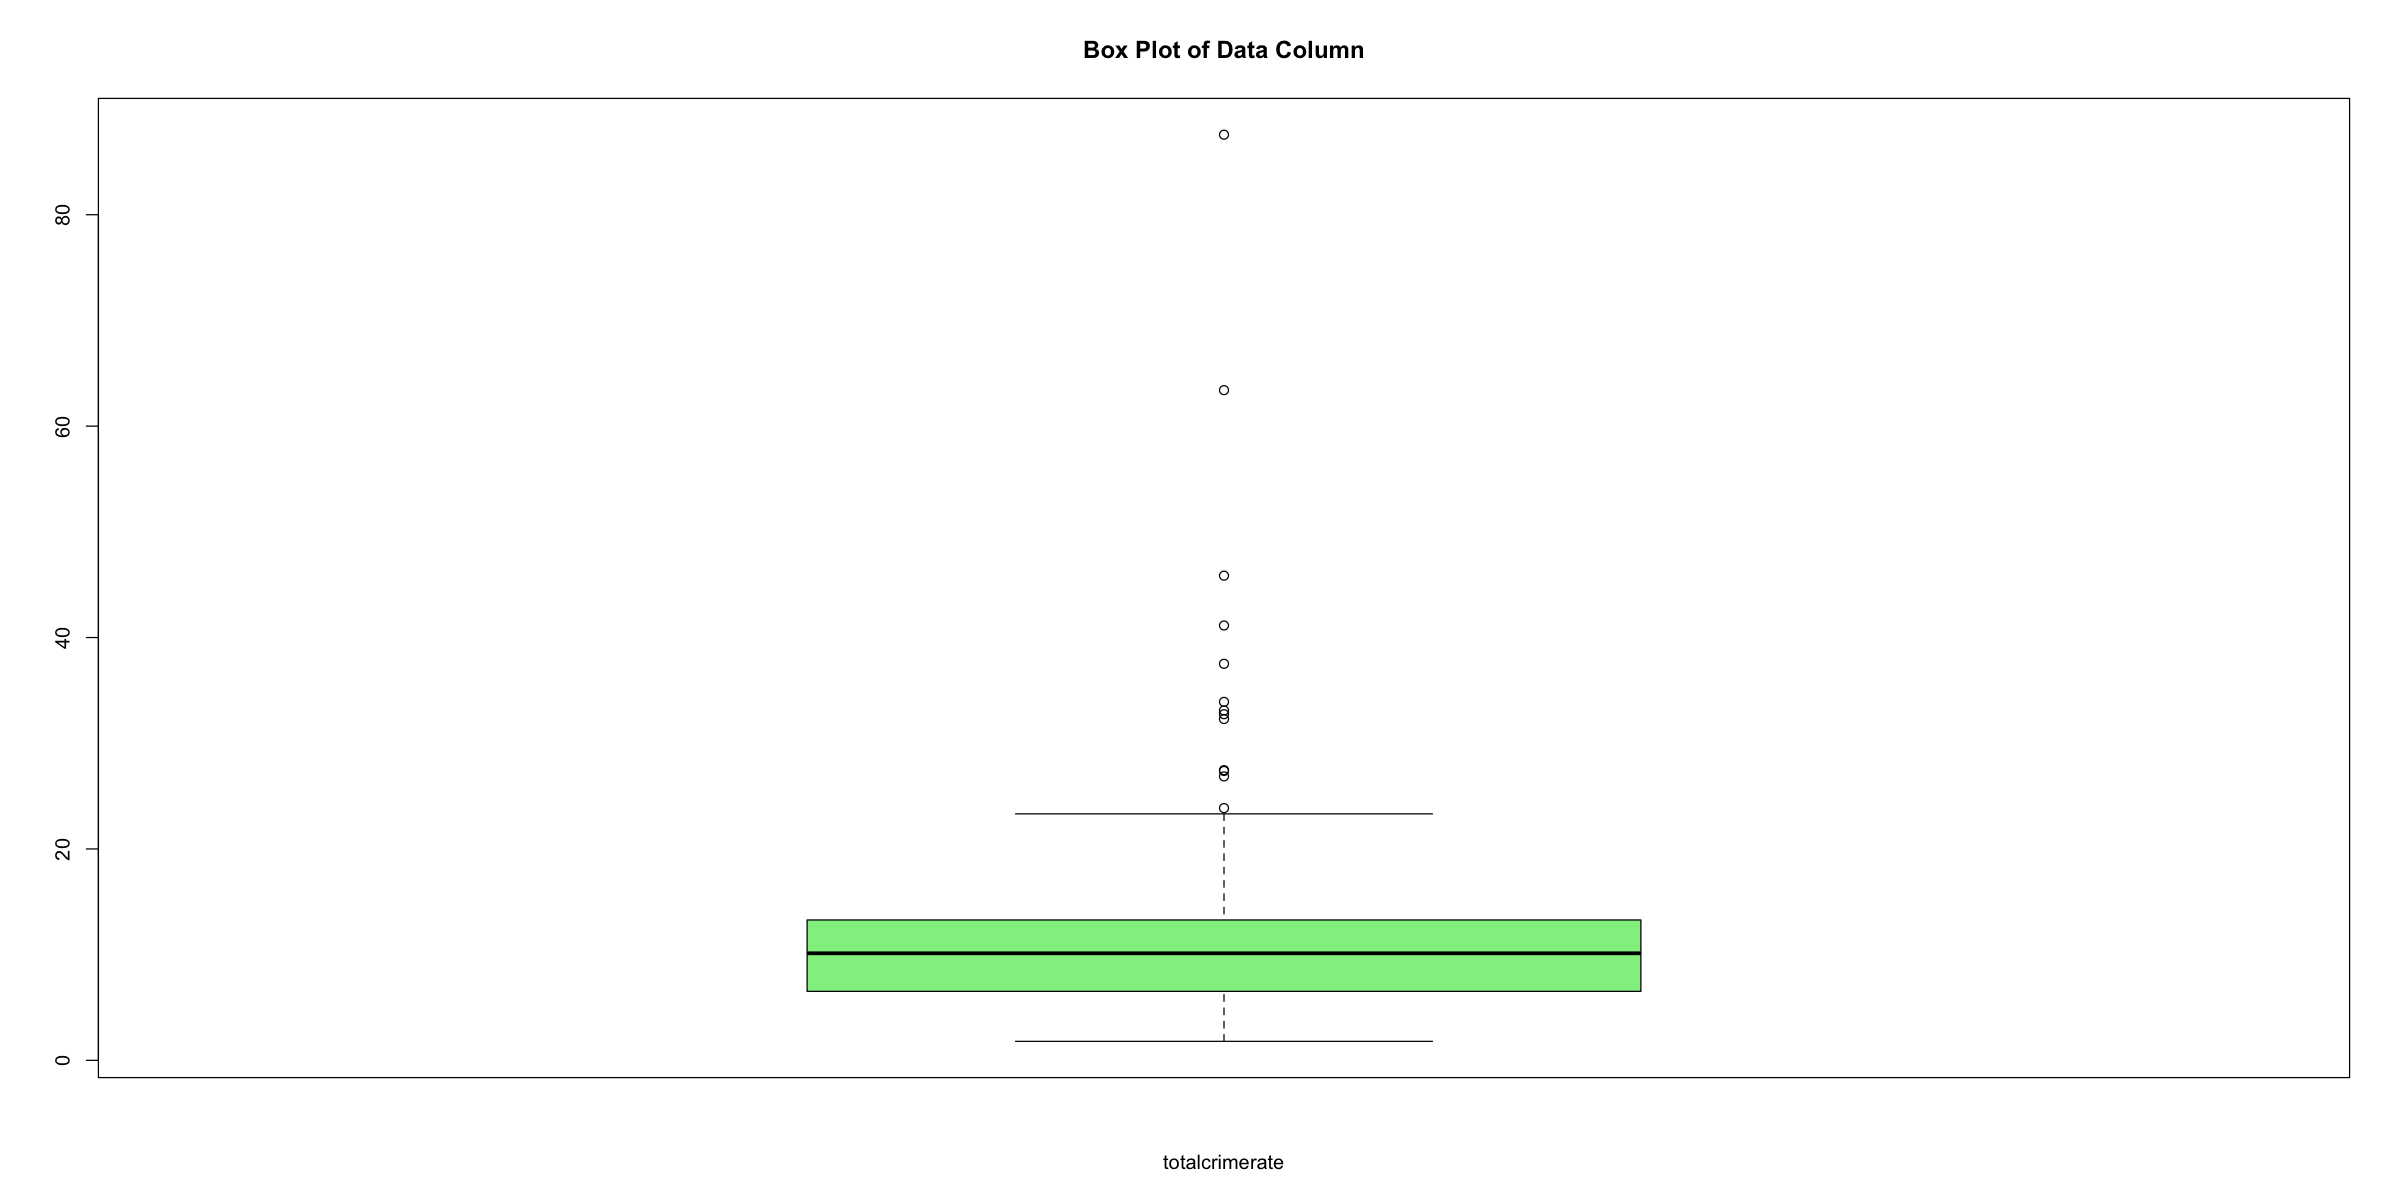

In [11]:
## totalcrimerate scatterplot

plot(reduced_data$'totalcrimerate', 
     main = "Density Plot of Data Column",
     xlab = "totalcrimerate",
     ylab = "",
     col = "blue"
)

boxplot(reduced_data$'totalcrimerate', 
        main = "Box Plot of Data Column",
        xlab = "totalcrimerate",
        col = "lightgreen"
)

## totalcrimerate > 30
cat("totalcrimerate > 30 is", end = " ")
cat(dim(reduced_data[reduced_data$totalcrimerate>30,])[1], end='\n')
cat("totalcrimerate > 40 is", end = " ")
cat(dim(reduced_data[reduced_data$totalcrimerate>40,])[1], end='\n')
cat("totalcrimerate > 30 is", end = " ")
cat(dim(reduced_data[reduced_data$totalcrimerate>80,])[1], end='\n')

Warning message in geom_density(binwidth = 0.5, boundary = 0):
“Ignoring unknown parameters: `binwidth` and `boundary`”


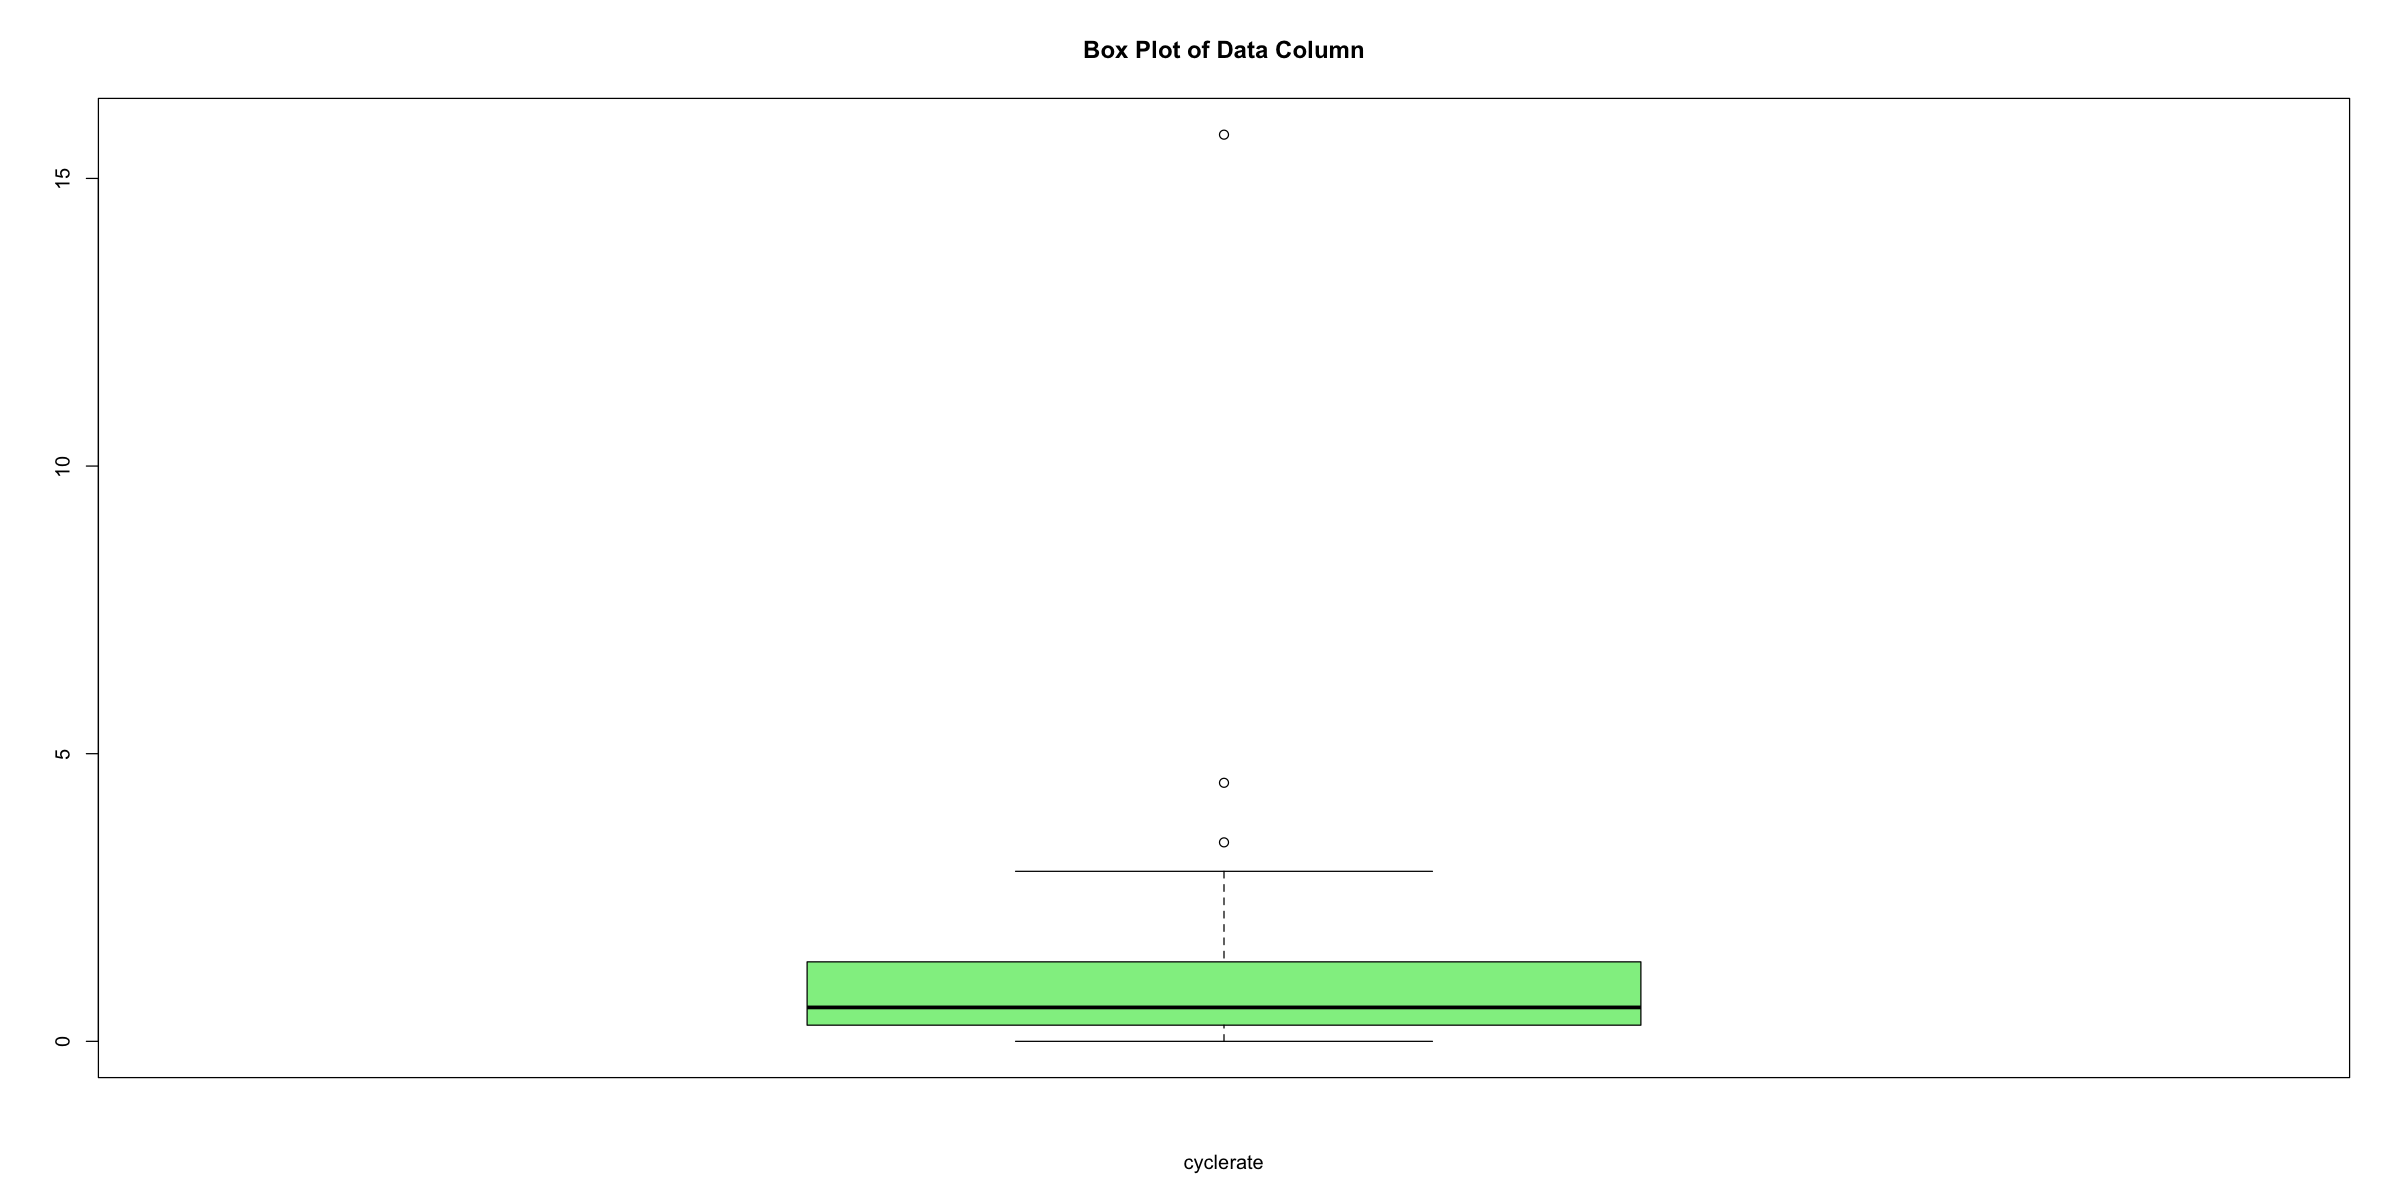

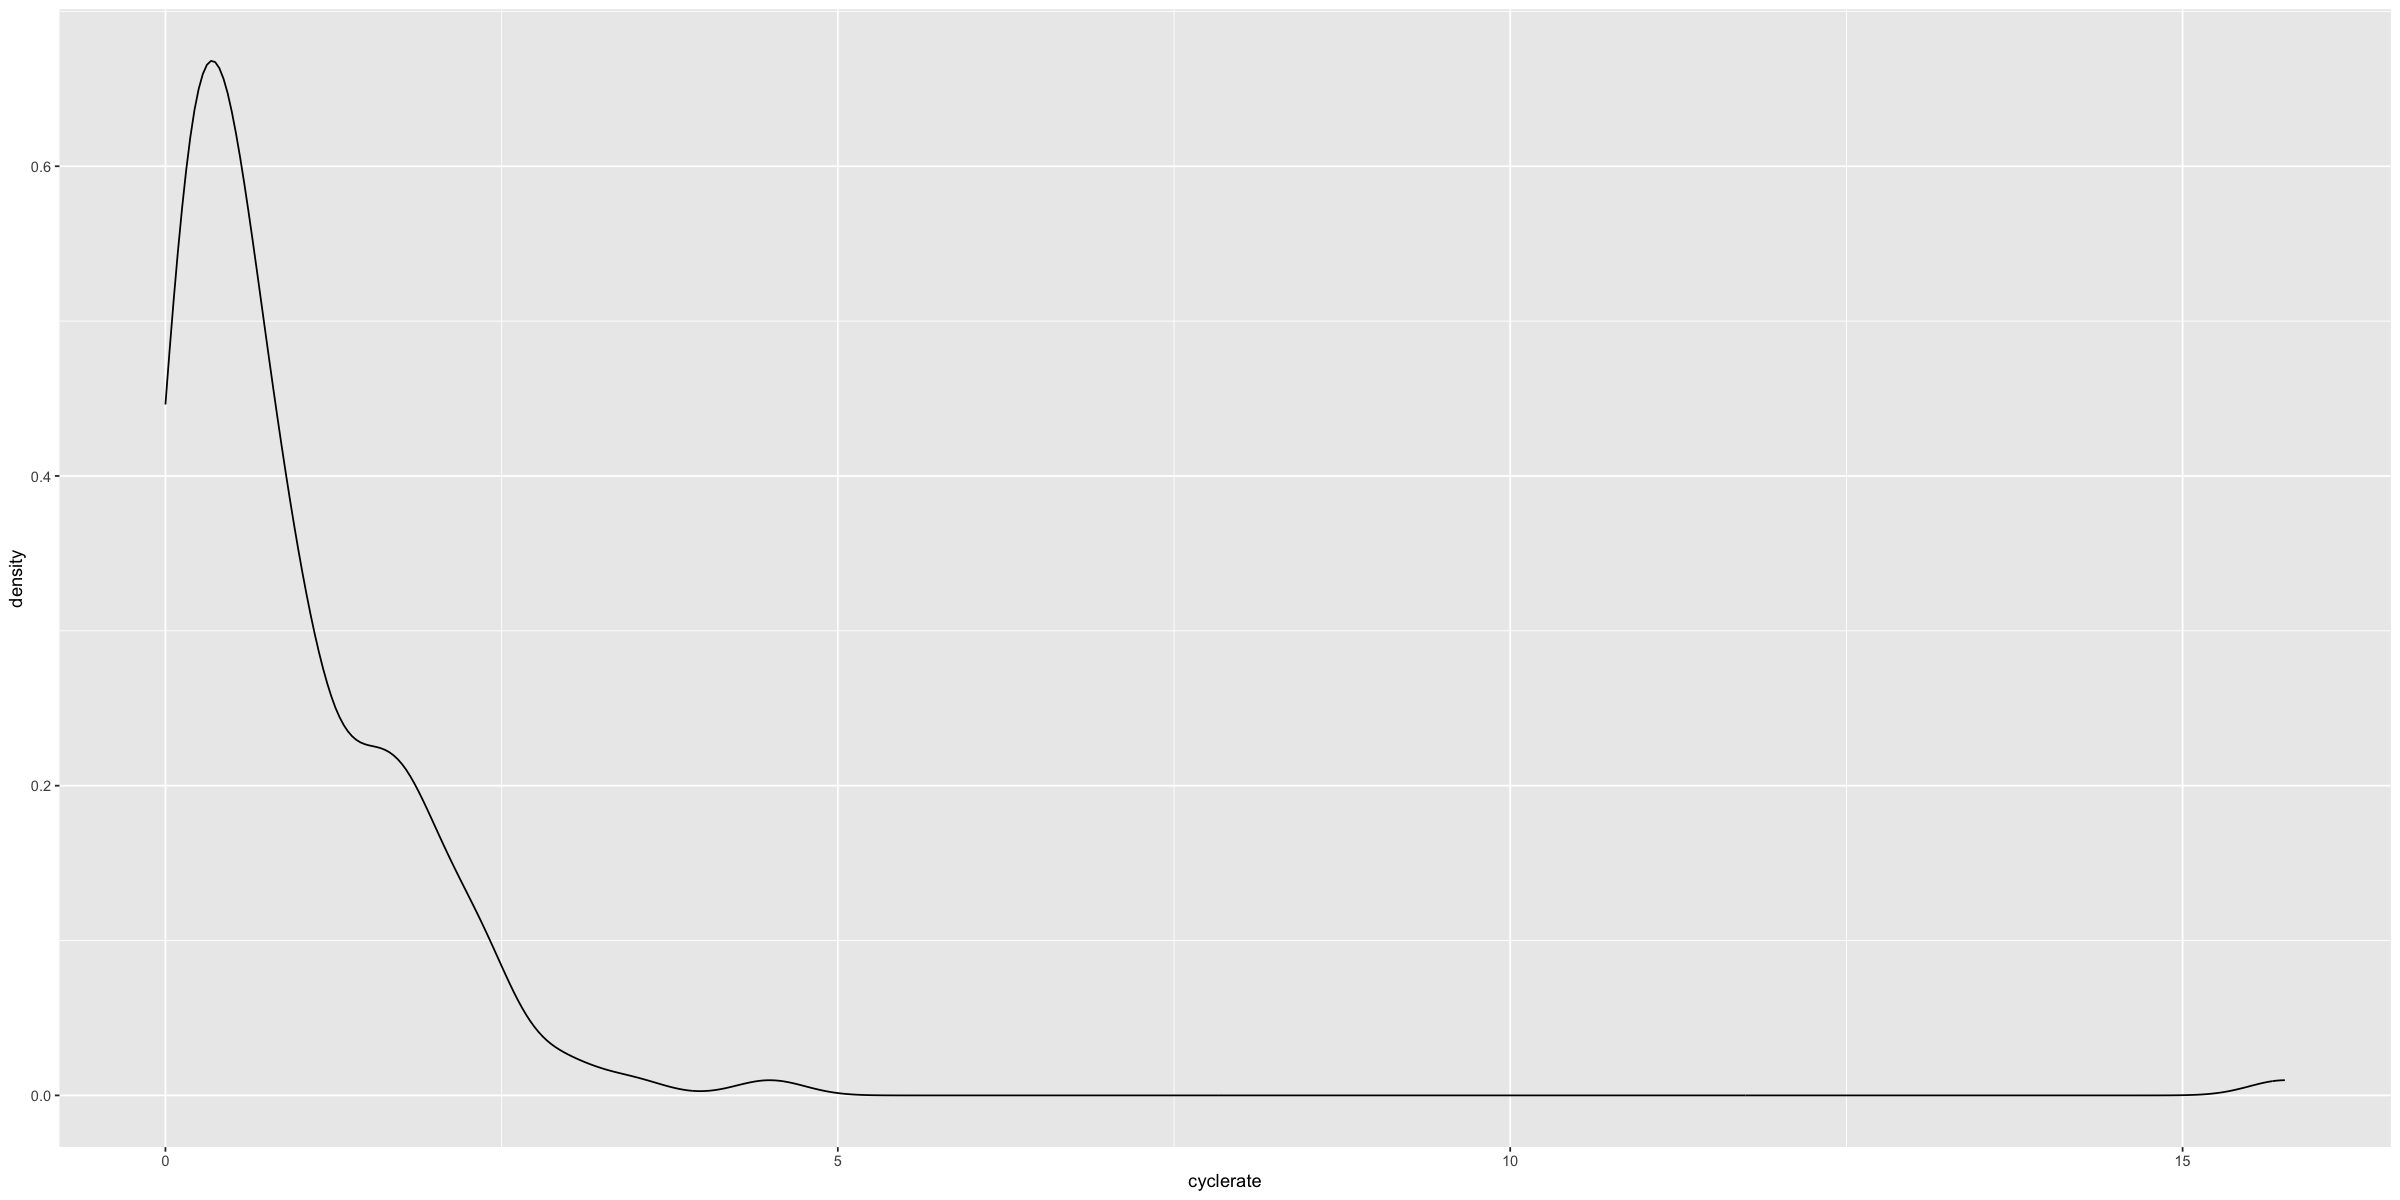

In [12]:
## cyclerate

## totalcrimerate scatterplot

boxplot(reduced_data$'cyclerate', 
        main = "Box Plot of Data Column",
        xlab = "cyclerate",
        col = "lightgreen"
)

ggplot(data = reduced_data, aes(x = cyclerate)) + geom_density(binwidth=0.5,boundary = 0) +
  labs(x = "cyclerate")


## logtransform the cyclerate
# df$cyclerate <- log(df$cyclerate)

In [1]:
## Box plot for all other variables
options(repr.plot.width = 20,repr.plot.height = 0, cex=20)
par(mfrow = c(4, 4))

boxplot(reduced_data$'totalcrimerate', 
        main = "Box Plot of totalcrimerate",
        ylab = "Y-axis label",
        col = "lightgreen"
)

boxplot(reduced_data$'cyclerate', 
        main = "Box Plot of prisoncycle",
        ylab = "Y-axis label",
        col = "lightgreen"
)

boxplot(reduced_data$'resmobility', 
        main = "Box Plot of resmobility",
        ylab = "Y-axis label",
        col = "lightgreen"
)
boxplot(reduced_data$'povertyrate', 
        main = "Box Plot of povertyrate",
        ylab = "Y-axis label",
        col = "lightgreen"
)
boxplot(reduced_data$'sharesingleparent', 
        main = "Box Plot of sharesingleparent",
        ylab = "Y-axis label",
        col = "lightgreen"
)
boxplot(reduced_data$'unemprate', 
        main = "Box Plot of unemprate",
        ylab = "Y-axis label",
        col = "lightgreen"
)

boxplot(reduced_data$'medinc', 
        main = "Box Plot of medinc",
        ylab = "Y-axis label",
        col = "lightgreen"
)
boxplot(reduced_data$'pop', 
        main = "Box Plot of pop",
        ylab = "Y-axis label",
        col = "lightgreen"
)

ERROR: Error in eval(expr, envir, enclos): object 'reduced_data' not found


                  totalcrimerate  cyclerate sharesingleparent povertyrate
totalcrimerate        1.00000000  0.4498859       -0.01756836  0.20741154
cyclerate             0.44988587  1.0000000        0.38207471  0.30238565
sharesingleparent    -0.01756836  0.3820747        1.00000000  0.40689072
povertyrate           0.20741154  0.3023857        0.40689072  1.00000000
unemprate             0.40952956  0.5001617        0.31644432  0.54262890
resmobility           0.16697203 -0.1215157       -0.51869649  0.27667732
pop                  -0.23579061 -0.2114851       -0.07417703 -0.01086414
medinc               -0.13735146 -0.3273991       -0.52679307 -0.81961324
                   unemprate resmobility         pop      medinc
totalcrimerate     0.4095296  0.16697203 -0.23579061 -0.13735146
cyclerate          0.5001617 -0.12151566 -0.21148508 -0.32739909
sharesingleparent  0.3164443 -0.51869649 -0.07417703 -0.52679307
povertyrate        0.5426289  0.27667732 -0.01086414 -0.81961324
unemprate

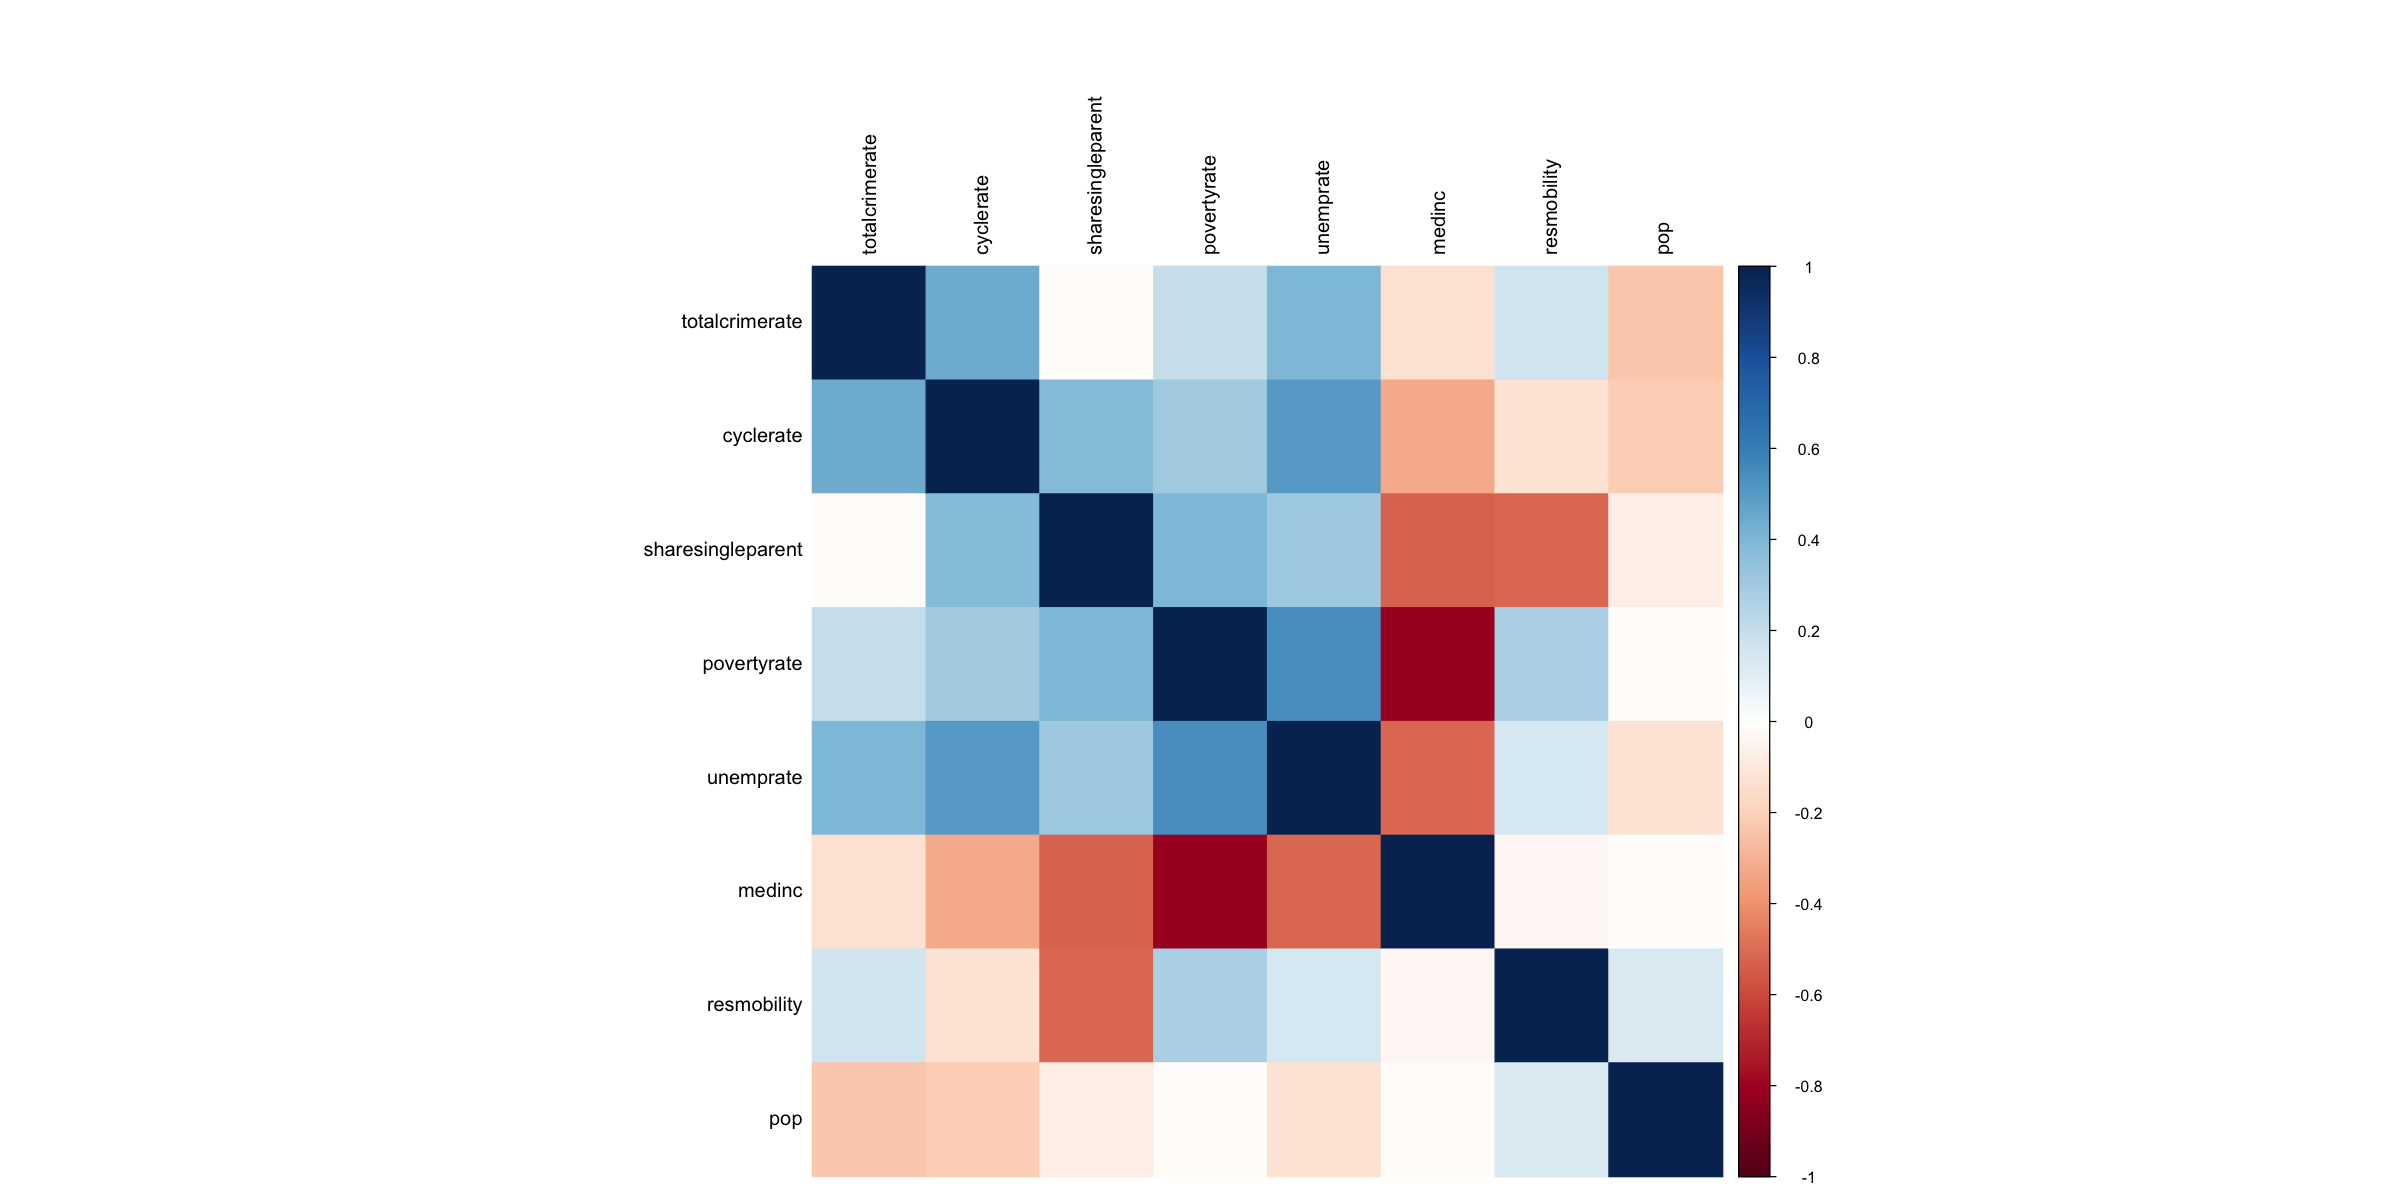

In [13]:
# Calculate correlation matrix
cor_matrix <- cor(reduced_data)
print(cor_matrix)

# Create a colorful correlation heatmap
corrplot(cor_matrix, method = "color", type = "full", order = "hclust", tl.col = "black")

## Data Modifications

In [14]:
log_y <- reduced_data
log_y$totalcrimerate <- log(log_y$totalcrimerate)

In [15]:
logy_73 <- log_y[-73,]

In [16]:
logy_73_14 <- logy_73[-14,]
logy_73_14_17 <- logy_73_14[-16,]

In [17]:
m5 <- logy_73_14_17[-22,]

In [18]:
m6 <- m5[-22,]

# Model Fitting

In [19]:
lmod <- lm(totalcrimerate ~ cyclerate + resmobility+povertyrate+sharesingleparent+unemprate+medinc+pop, data=reduced_data)
summary(lmod)


Call:
lm(formula = totalcrimerate ~ cyclerate + resmobility + povertyrate + 
    sharesingleparent + unemprate + medinc + pop, data = reduced_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.387  -3.791  -0.827   1.843  53.731 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.049e+00  6.620e+00   1.065  0.28869    
cyclerate          2.799e+00  5.992e-01   4.672 6.66e-06 ***
resmobility        4.897e+00  7.670e+00   0.638  0.52418    
povertyrate        6.882e+00  1.227e+01   0.561  0.57587    
sharesingleparent -2.238e+01  1.141e+01  -1.961  0.05180 .  
unemprate          4.544e+01  1.641e+01   2.769  0.00634 ** 
medinc             4.314e-05  8.428e-05   0.512  0.60951    
pop               -9.734e-04  4.680e-04  -2.080  0.03923 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.774 on 148 degrees of freedom
Multiple R-squared:  0.3309,	Adjusted R-squared:  0.2992 
F-statisti

In [20]:
logy_lmod <- lm(totalcrimerate ~ cyclerate + resmobility+povertyrate+sharesingleparent+unemprate+medinc+pop, data=log_y)
summary(logy_lmod)


Call:
lm(formula = totalcrimerate ~ cyclerate + resmobility + povertyrate + 
    sharesingleparent + unemprate + medinc + pop, data = log_y)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04960 -0.31747  0.01547  0.25564  1.95367 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.819e+00  4.165e-01   4.367 2.36e-05 ***
cyclerate          1.394e-01  3.771e-02   3.698 0.000305 ***
resmobility        5.241e-01  4.827e-01   1.086 0.279304    
povertyrate        5.105e-01  7.724e-01   0.661 0.509697    
sharesingleparent  3.209e-01  7.183e-01   0.447 0.655696    
unemprate          1.340e+00  1.033e+00   1.298 0.196373    
medinc             1.347e-06  5.304e-06   0.254 0.799881    
pop               -6.451e-05  2.945e-05  -2.191 0.030043 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5521 on 148 degrees of freedom
Multiple R-squared:  0.2609,	Adjusted R-squared:  0.226 
F-stati

In [21]:
logy_73_lmod <- lm(totalcrimerate ~ cyclerate + resmobility+povertyrate+sharesingleparent+unemprate+medinc+pop, data=logy_73)
summary(logy_73_lmod)


Call:
lm(formula = totalcrimerate ~ cyclerate + resmobility + povertyrate + 
    sharesingleparent + unemprate + medinc + pop, data = logy_73)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9345 -0.2983 -0.0012  0.2679  2.0015 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.580e+00  3.818e-01   4.137 5.89e-05 ***
cyclerate          5.302e-01  7.773e-02   6.821 2.19e-10 ***
resmobility        4.479e-01  4.398e-01   1.018   0.3102    
povertyrate        9.499e-01  7.079e-01   1.342   0.1817    
sharesingleparent -1.823e+00  7.579e-01  -2.405   0.0174 *  
unemprate          8.637e-01  9.443e-01   0.915   0.3619    
medinc             4.169e-06  4.857e-06   0.858   0.3920    
pop               -4.364e-05  2.708e-05  -1.612   0.1092    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5029 on 147 degrees of freedom
Multiple R-squared:  0.3662,	Adjusted R-squared:  0.336 
F-statistic: 12

In [22]:
logy_73_14_17_lmod <- lm(totalcrimerate ~ cyclerate + resmobility+povertyrate+sharesingleparent+unemprate+medinc+pop, data=logy_73_14_17)
summary(logy_73_14_17_lmod)


Call:
lm(formula = totalcrimerate ~ cyclerate + resmobility + povertyrate + 
    sharesingleparent + unemprate + medinc + pop, data = logy_73_14_17)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0858 -0.2769 -0.0140  0.2351  1.9368 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.240e+00  3.402e-01   3.644 0.000373 ***
cyclerate          4.051e-01  7.163e-02   5.656 7.99e-08 ***
resmobility        7.421e-01  3.925e-01   1.891 0.060655 .  
povertyrate        9.837e-01  6.477e-01   1.519 0.130992    
sharesingleparent -1.546e+00  6.763e-01  -2.286 0.023717 *  
unemprate          3.947e+00  1.001e+00   3.944 0.000125 ***
medinc             5.807e-06  4.297e-06   1.351 0.178671    
pop               -4.902e-05  2.387e-05  -2.053 0.041854 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4431 on 145 degrees of freedom
Multiple R-squared:  0.4721,	Adjusted R-squared:  0.4466 
F-statis

In [23]:
m5_lmod <- lm(totalcrimerate ~ cyclerate + resmobility+povertyrate+sharesingleparent+unemprate+medinc+pop, data=m5)
summary(m5_lmod)


Call:
lm(formula = totalcrimerate ~ cyclerate + resmobility + povertyrate + 
    sharesingleparent + unemprate + medinc + pop, data = m5)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0586 -0.2842 -0.0185  0.2266  1.4666 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.273e+00  3.174e-01   4.012 9.66e-05 ***
cyclerate          4.140e-01  6.683e-02   6.195 5.79e-09 ***
resmobility        6.241e-01  3.669e-01   1.701   0.0911 .  
povertyrate        1.018e+00  6.041e-01   1.685   0.0942 .  
sharesingleparent -1.587e+00  6.308e-01  -2.516   0.0129 *  
unemprate          3.948e+00  9.334e-01   4.230 4.14e-05 ***
medinc             5.024e-06  4.011e-06   1.252   0.2124    
pop               -3.953e-05  2.235e-05  -1.768   0.0791 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4132 on 144 degrees of freedom
Multiple R-squared:  0.5127,	Adjusted R-squared:  0.489 
F-statistic: 21.64 o

In [24]:
m6_lmod <- lm(totalcrimerate ~ cyclerate + resmobility+povertyrate+sharesingleparent+unemprate+medinc+pop, data=m6)
summary(m6_lmod)


Call:
lm(formula = totalcrimerate ~ cyclerate + resmobility + povertyrate + 
    sharesingleparent + unemprate + medinc + pop, data = m6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02271 -0.24833 -0.01354  0.21419  1.30377 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.532e+00  3.101e-01   4.941 2.15e-06 ***
cyclerate          4.169e-01  6.378e-02   6.536 1.04e-09 ***
resmobility        4.196e-01  3.540e-01   1.185   0.2379    
povertyrate        1.000e+00  5.765e-01   1.735   0.0849 .  
sharesingleparent -1.788e+00  6.042e-01  -2.960   0.0036 ** 
unemprate          3.721e+00  8.927e-01   4.168 5.29e-05 ***
medinc             2.385e-06  3.888e-06   0.613   0.5405    
pop               -4.333e-05  2.136e-05  -2.029   0.0443 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3943 on 143 degrees of freedom
Multiple R-squared:  0.5404,	Adjusted R-squared:  0.5179 
F-statist

# Diagnosis

## Checking Error Conditions

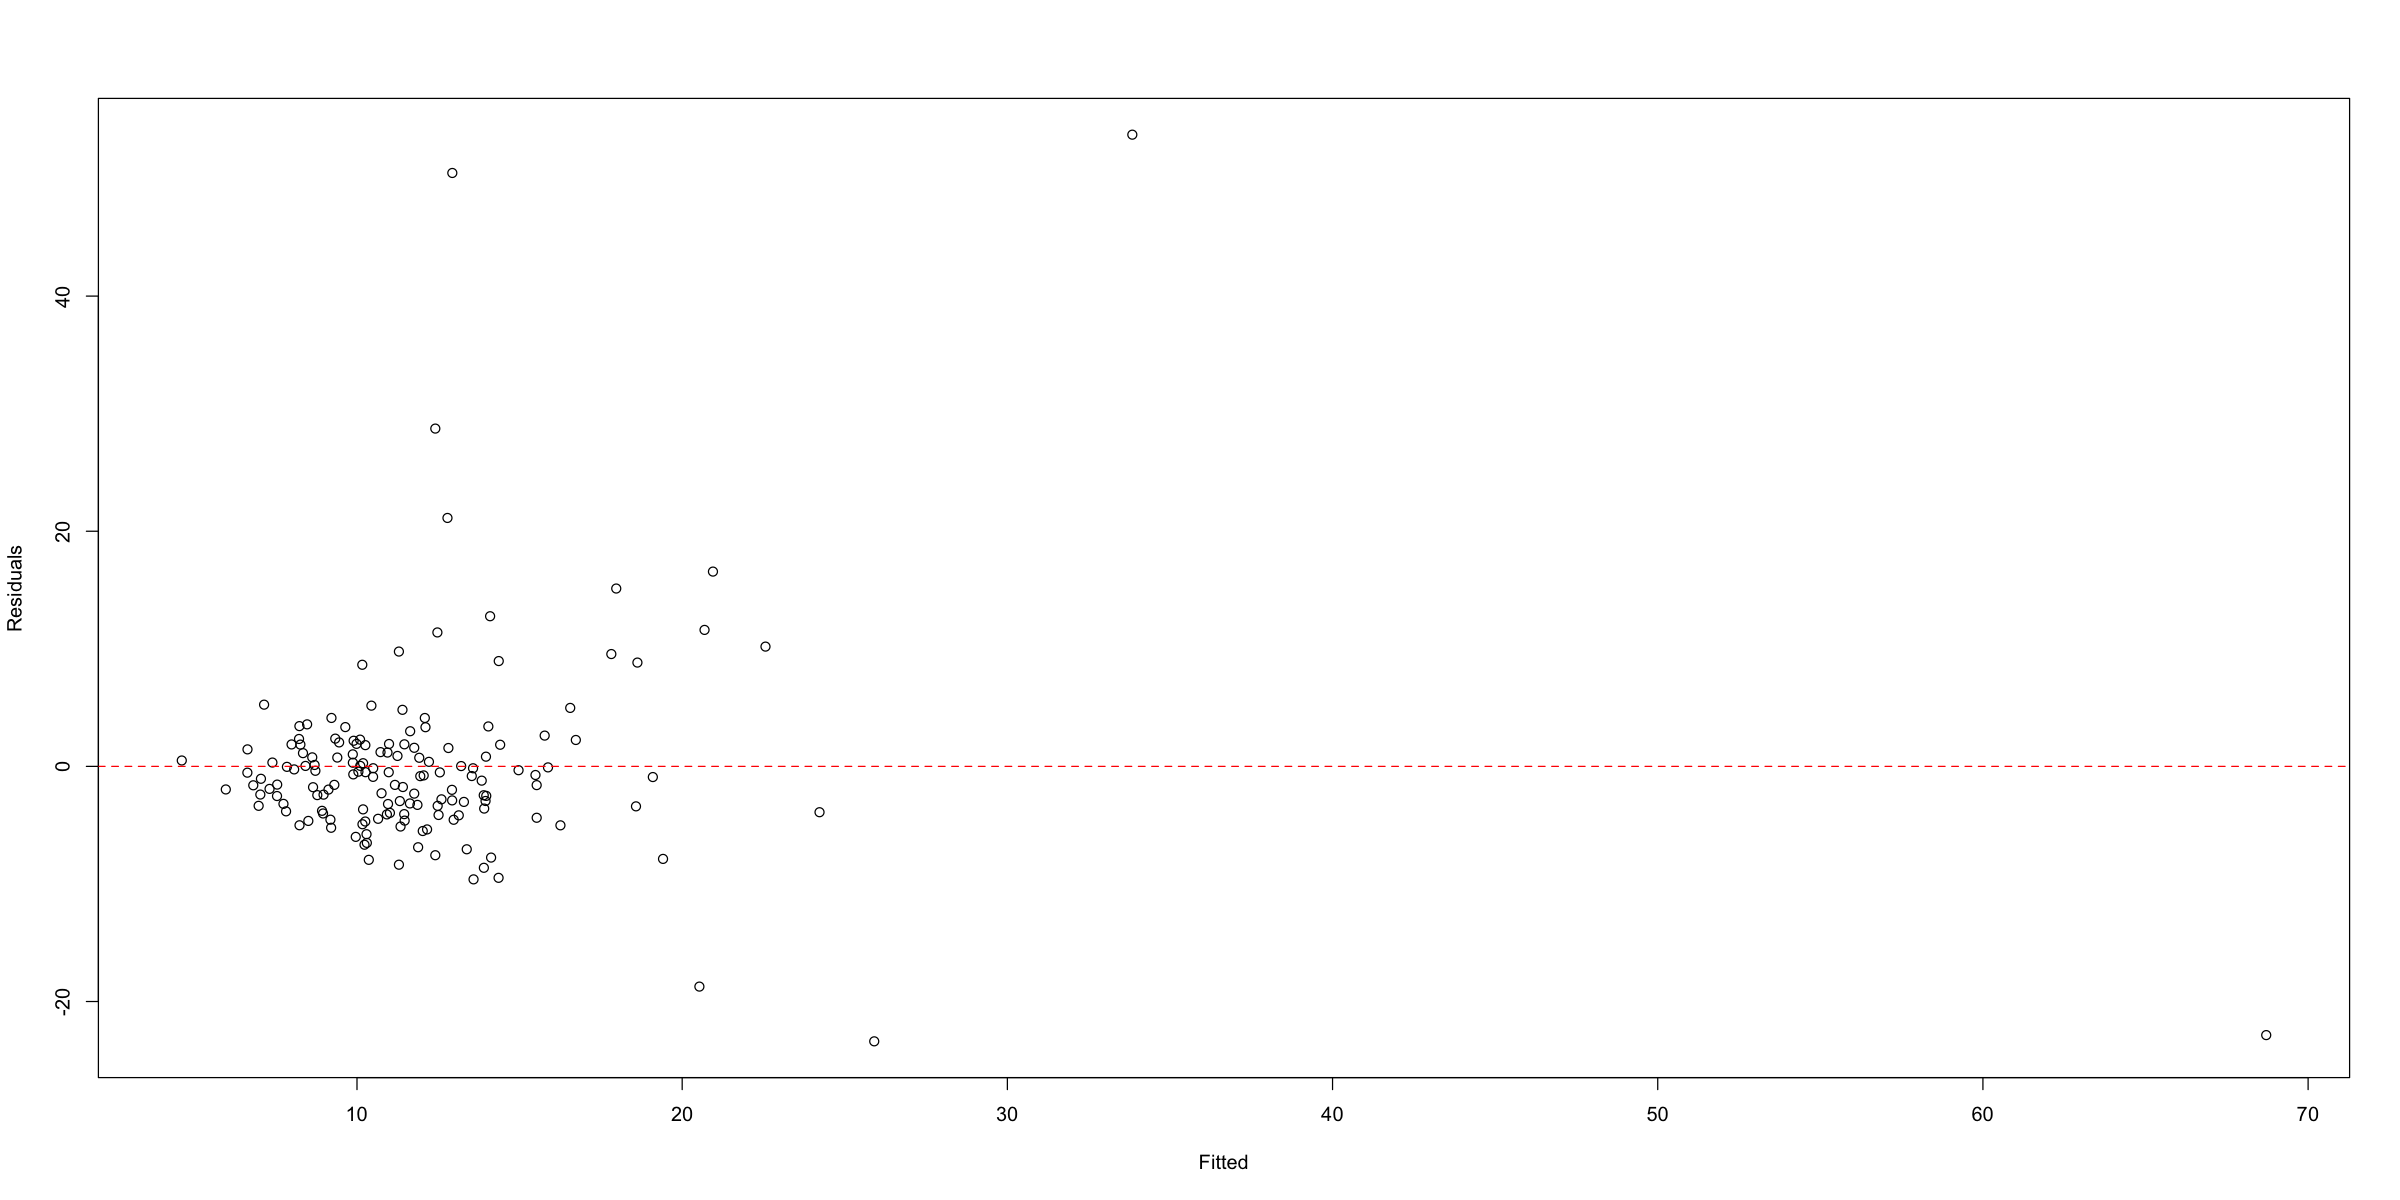

In [25]:
## Variance Stablization
options(repr.plot.width = 20,repr.plot.height = 10)

plot(fitted(lmod),residuals(lmod),xlab="Fitted",ylab="Residuals")
abline(h = 0, col = "red", lty = 2)

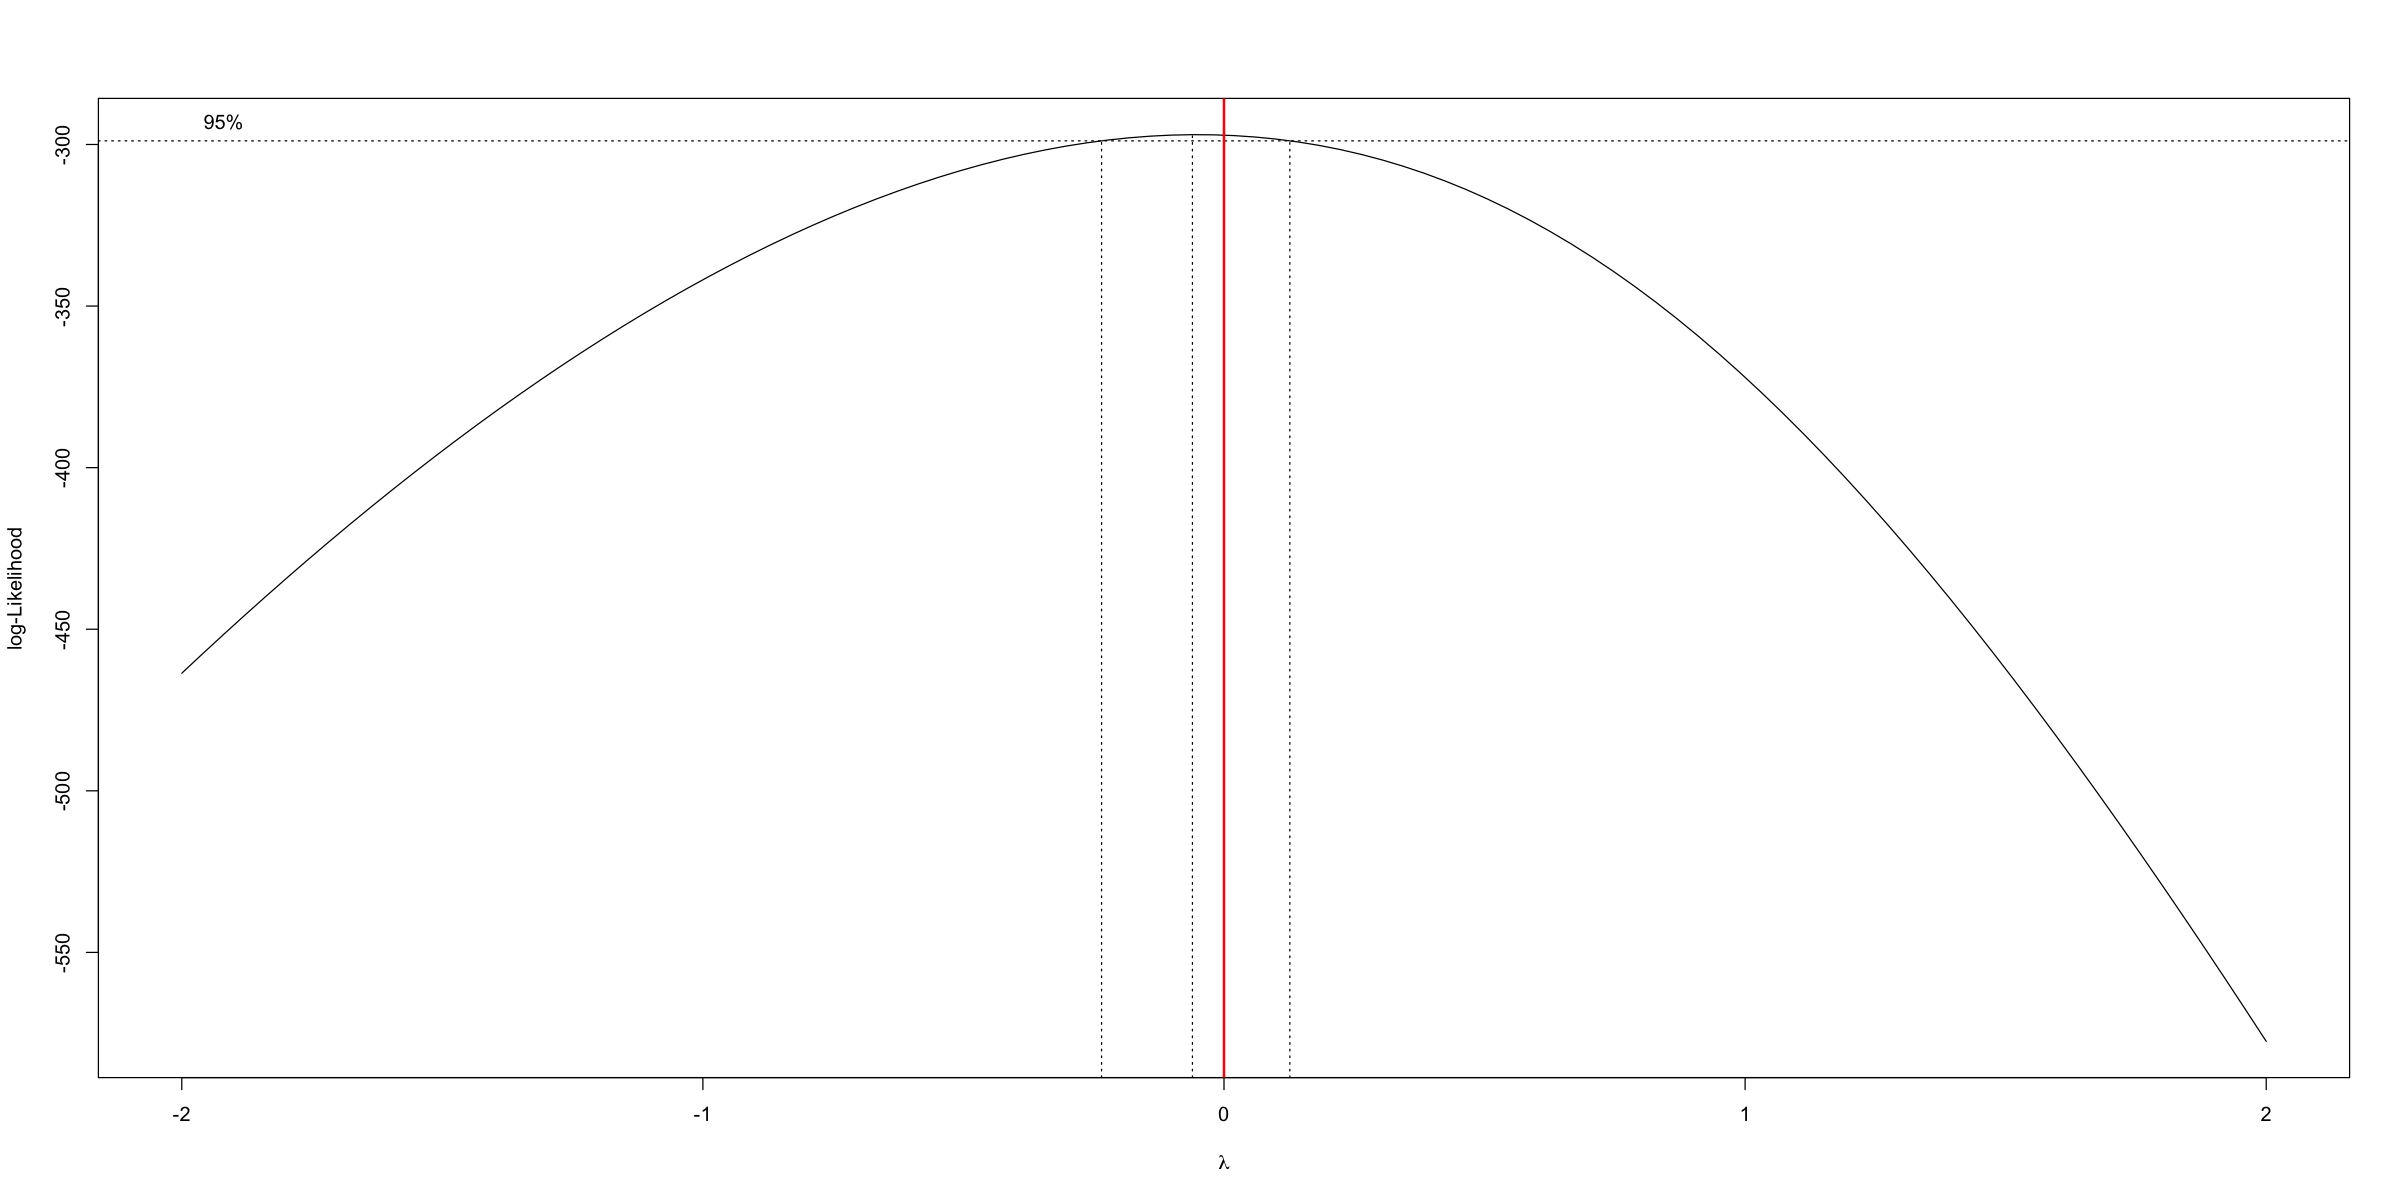

In [26]:
# Apply the Box-Cox transformation and plot
boxcox_result <- boxcox(lmod, lambda = seq(-2, 2, 1/10), plotit = TRUE)
# Add a vertical line at lambda = 0
abline(v = 0, col = "red", lwd = 2)

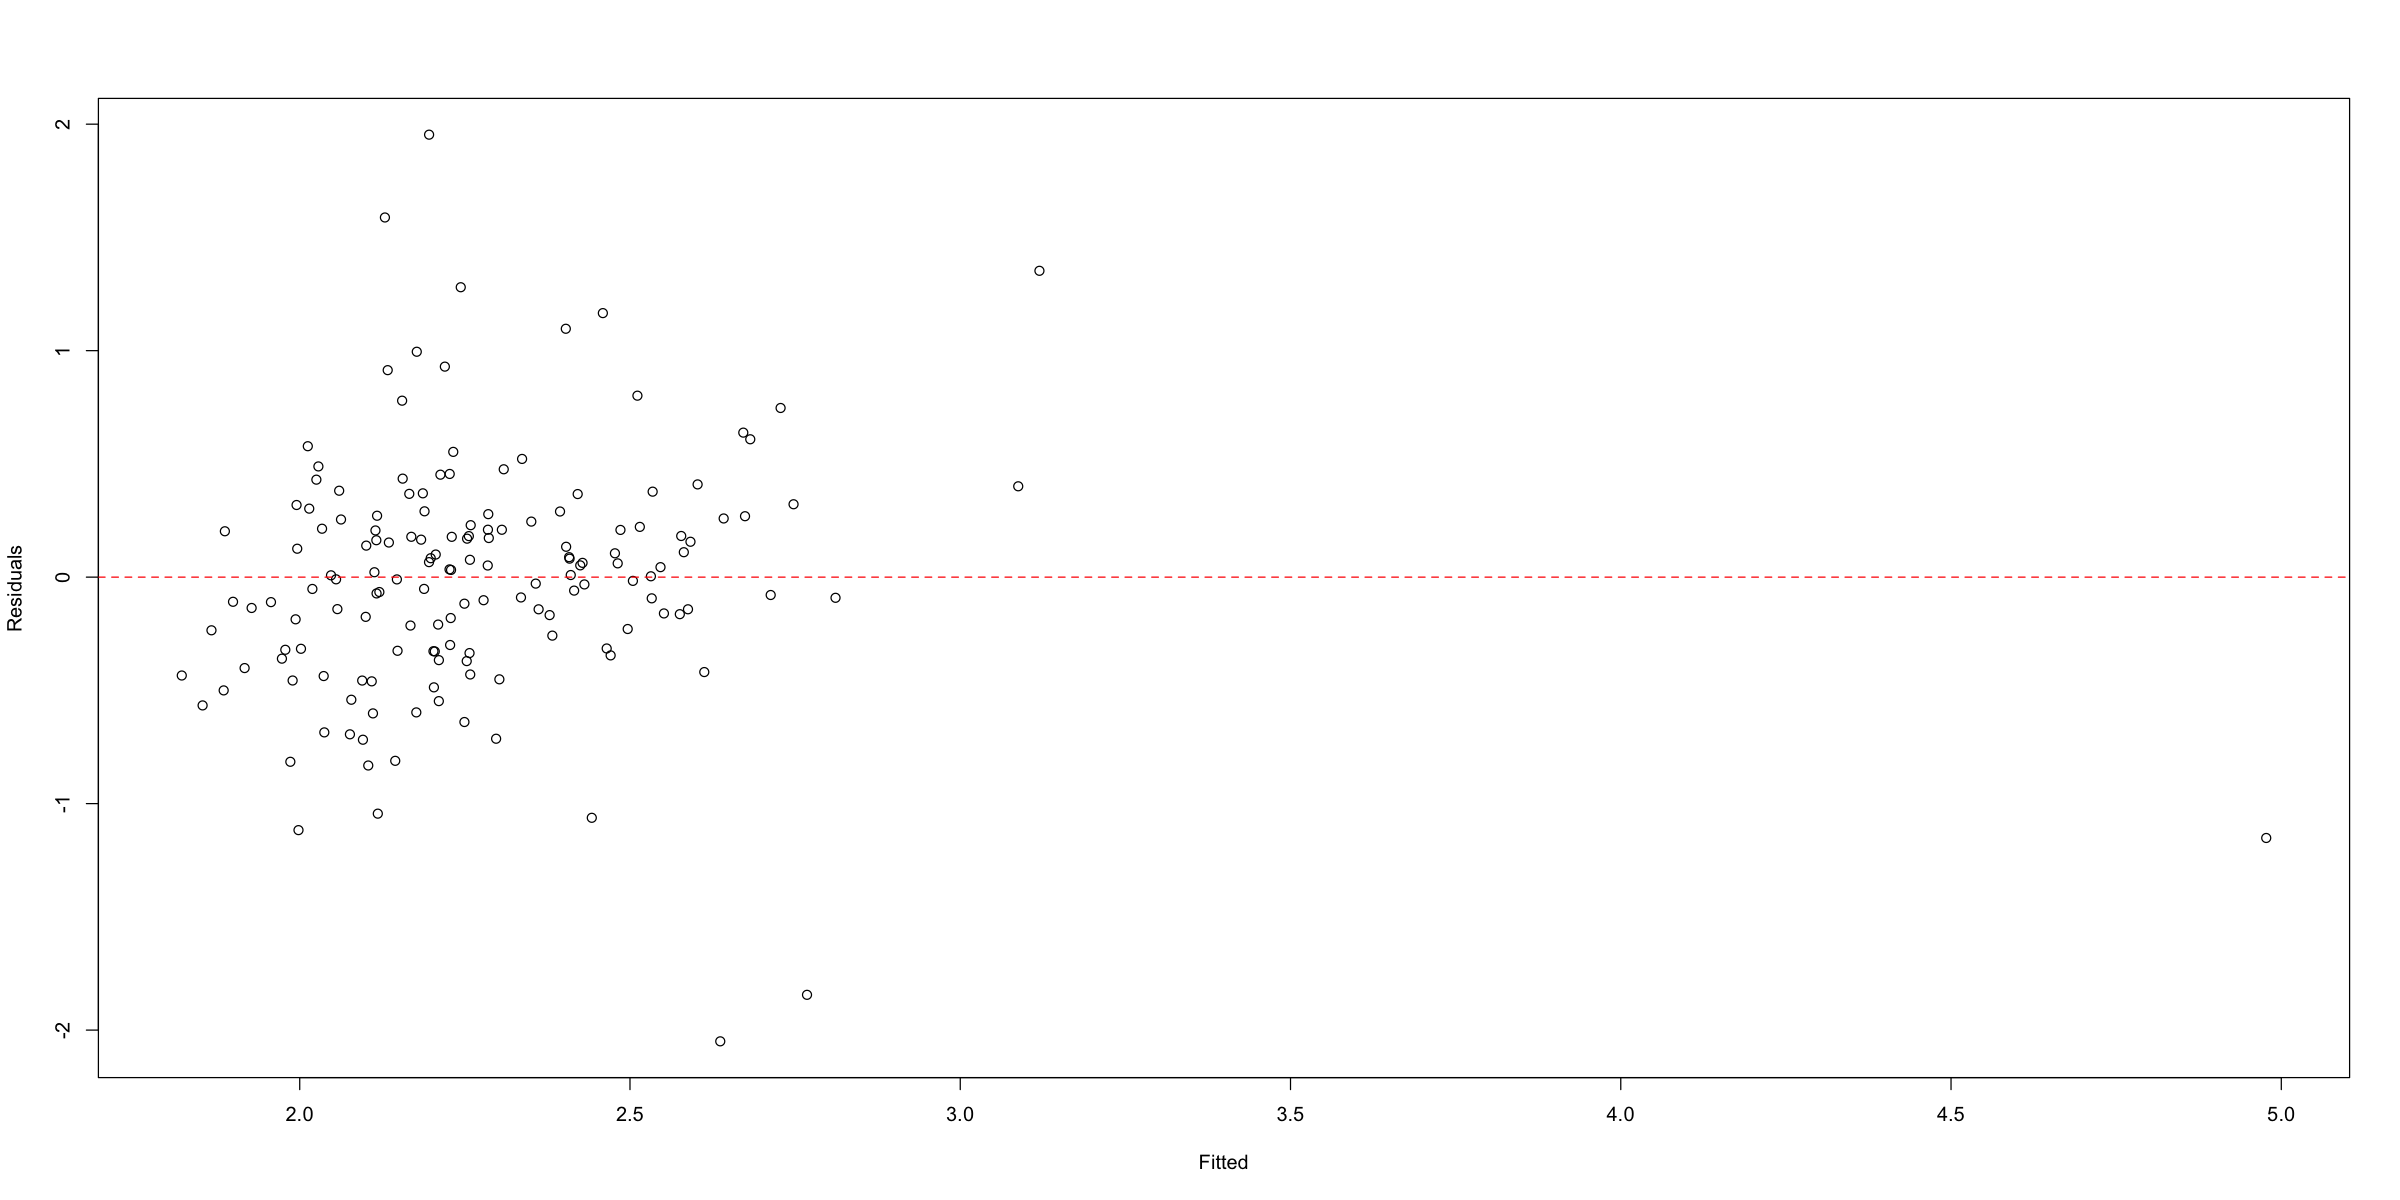

In [27]:
plot(fitted(logy_lmod),residuals(logy_lmod),xlab="Fitted",ylab="Residuals")
abline(h = 0, col = "red", lty = 2)

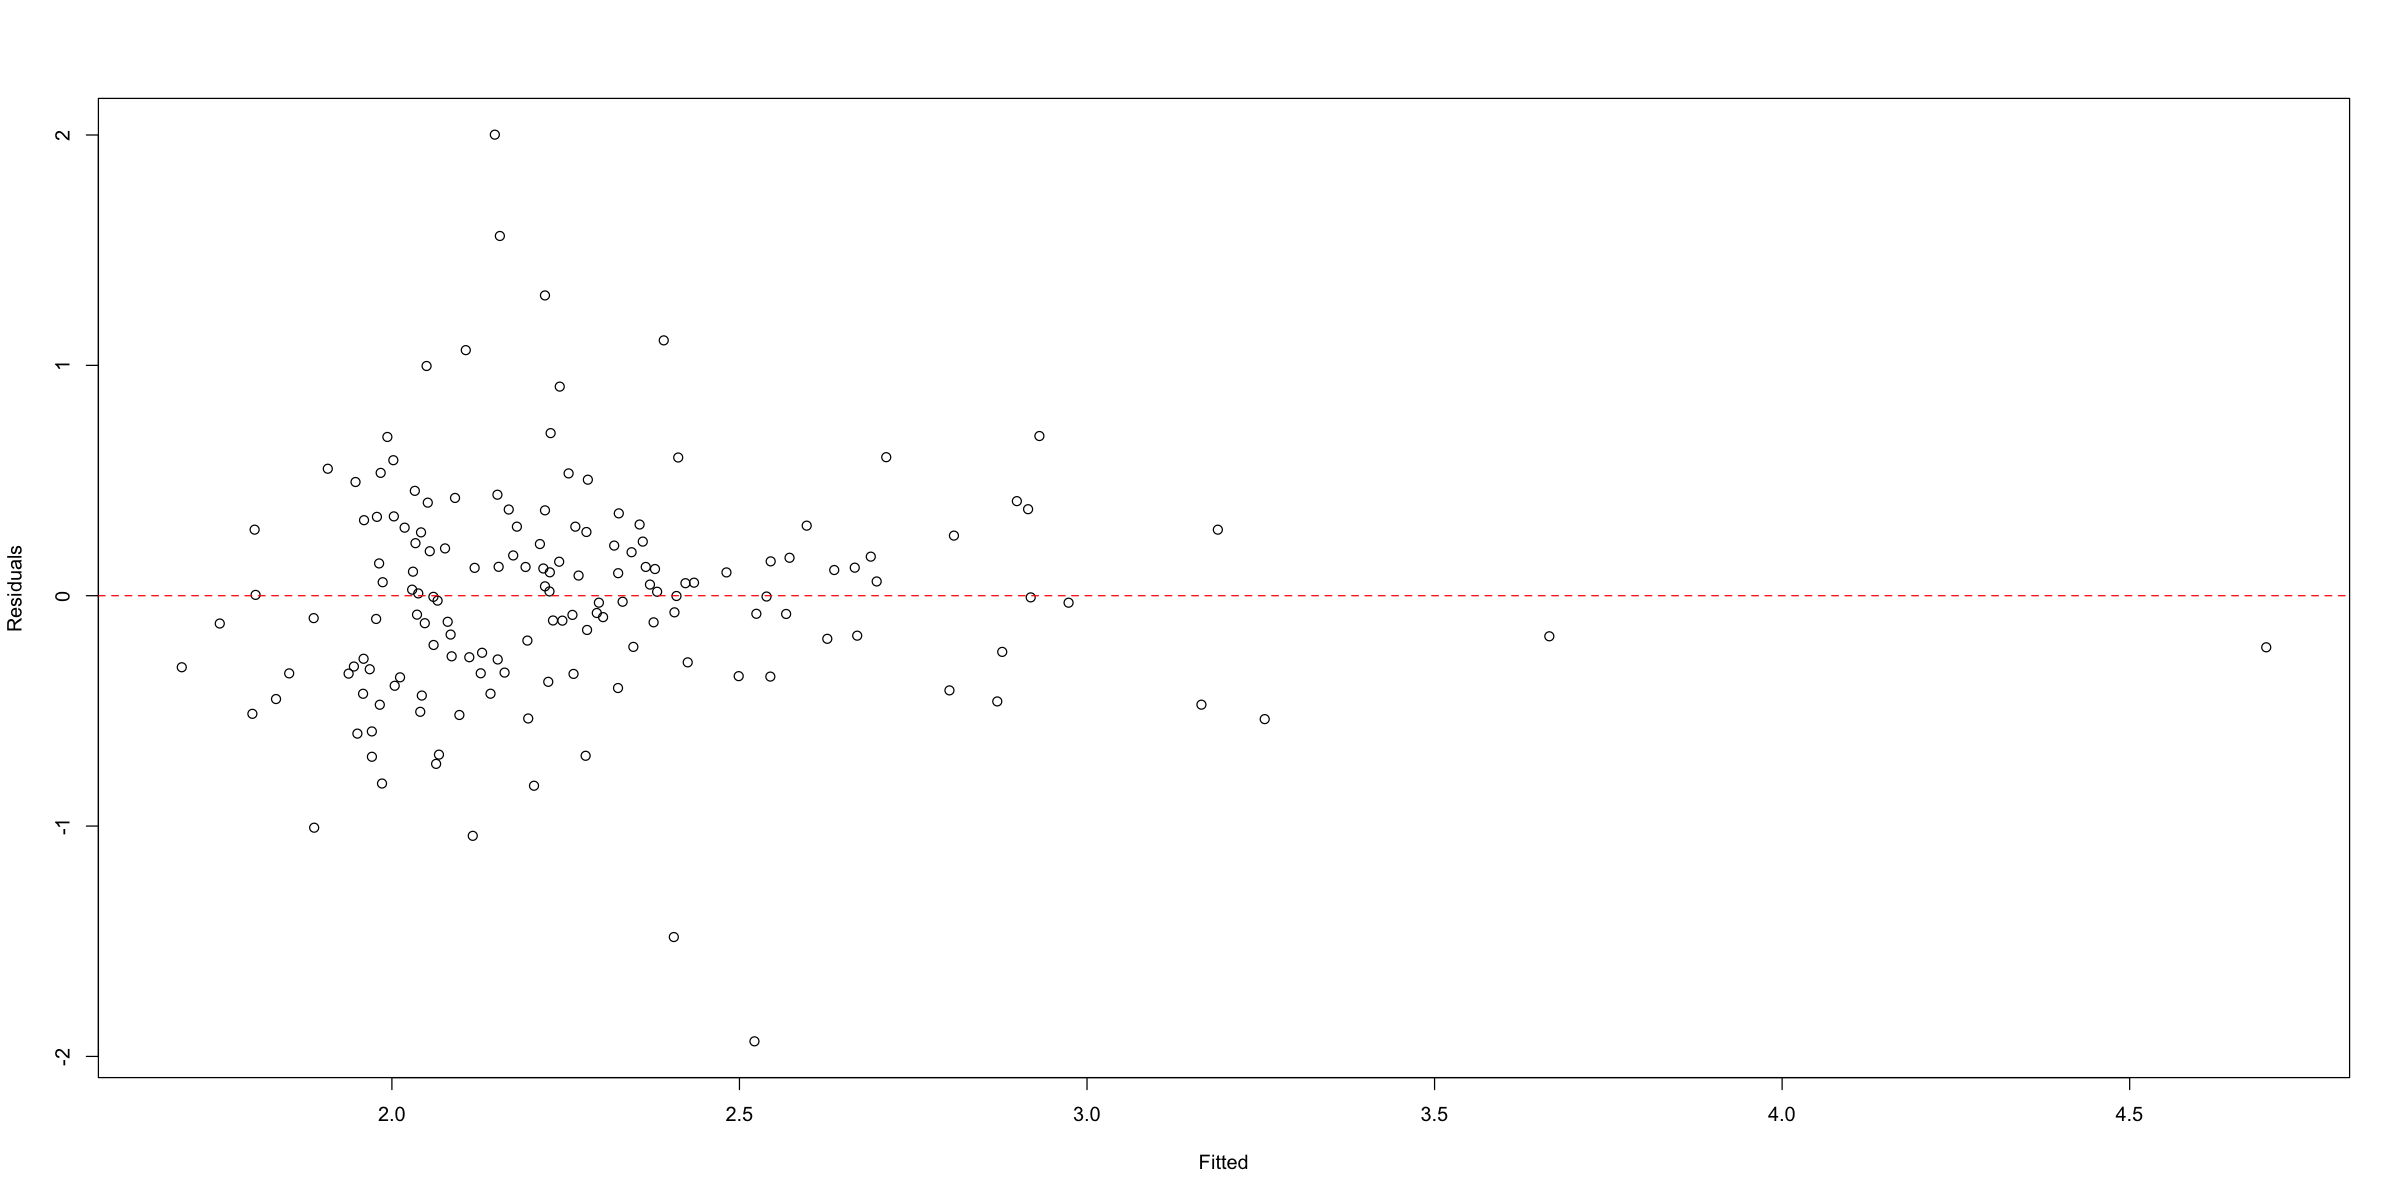

In [28]:
plot(fitted(logy_73_lmod),residuals(logy_73_lmod),xlab="Fitted",ylab="Residuals")
abline(h = 0, col = "red", lty = 2)

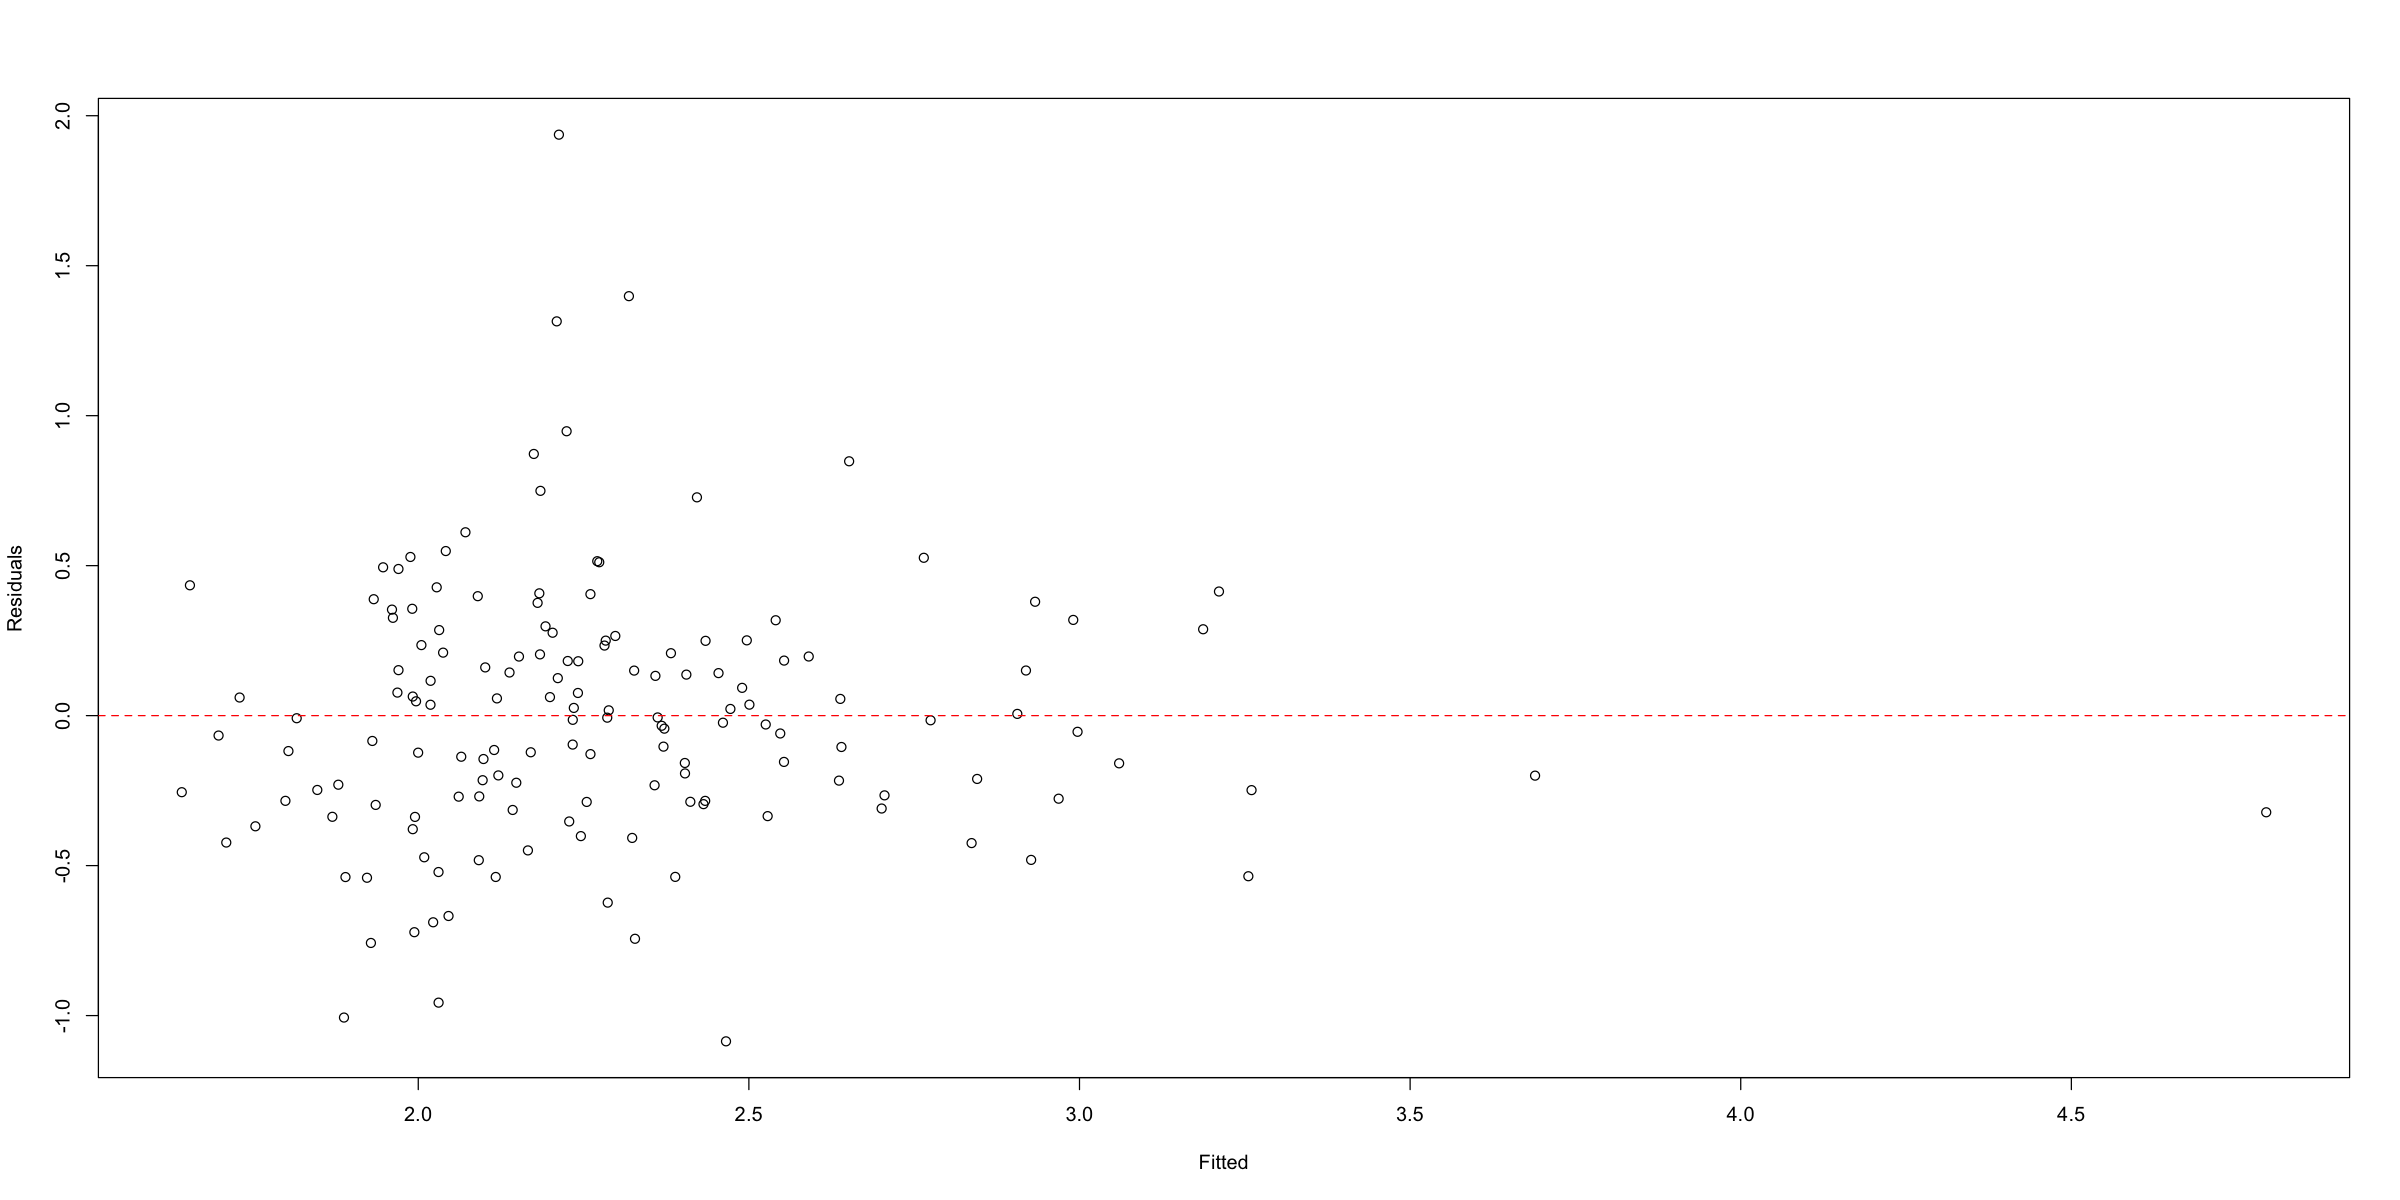

In [29]:
plot(fitted(logy_73_14_17_lmod),residuals(logy_73_14_17_lmod),xlab="Fitted",ylab="Residuals")
abline(h = 0, col = "red", lty = 2)

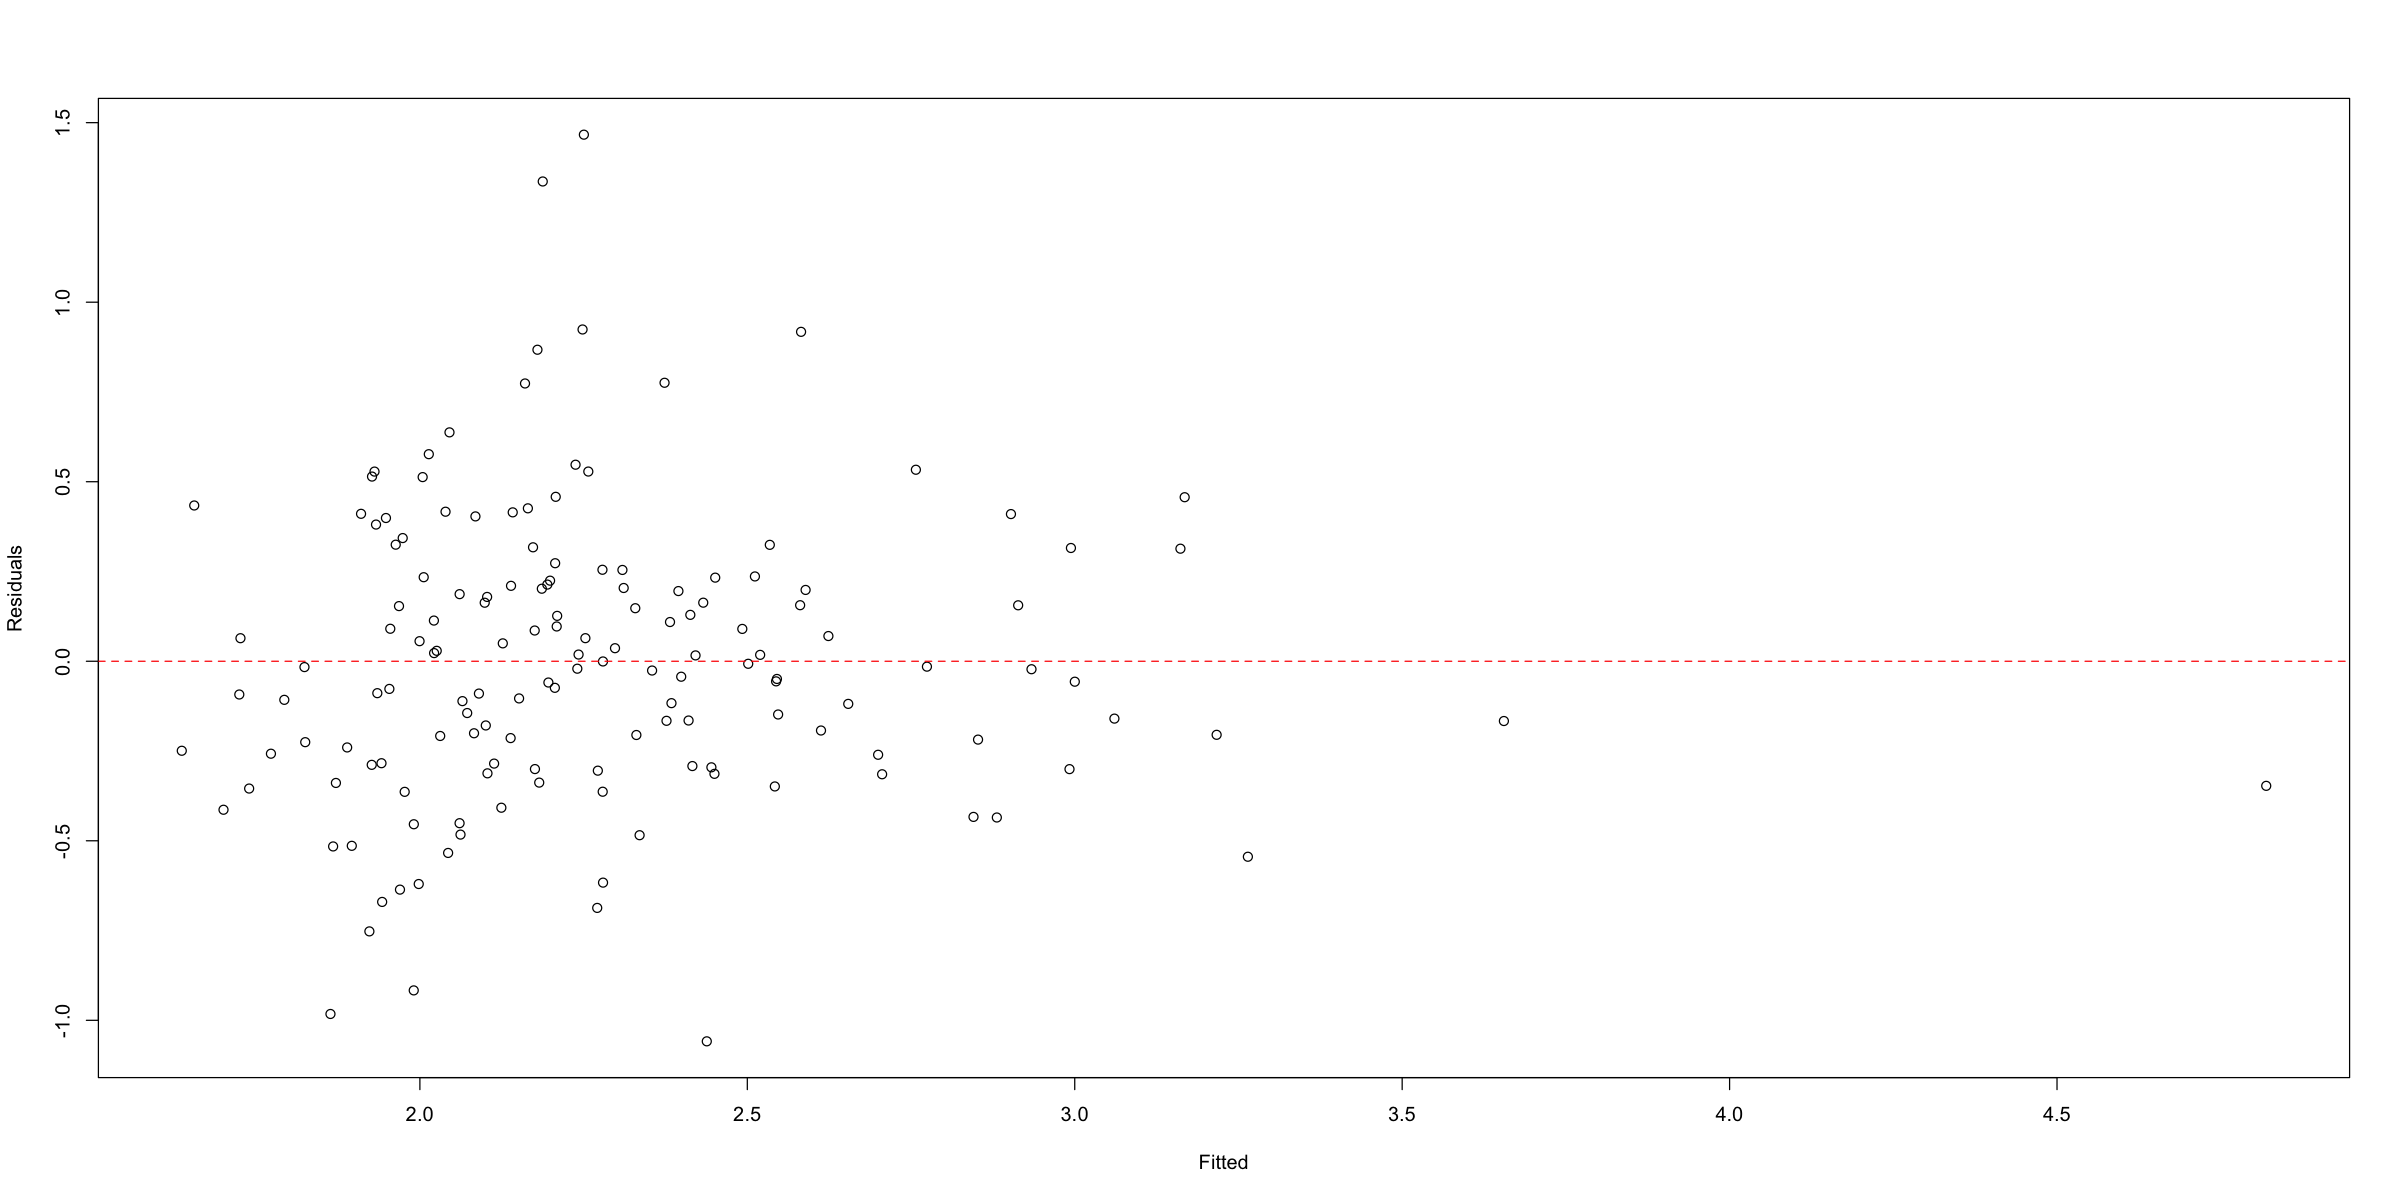

In [30]:
plot(fitted(m5_lmod),residuals(m5_lmod),xlab="Fitted",ylab="Residuals")
abline(h = 0, col = "red", lty = 2)

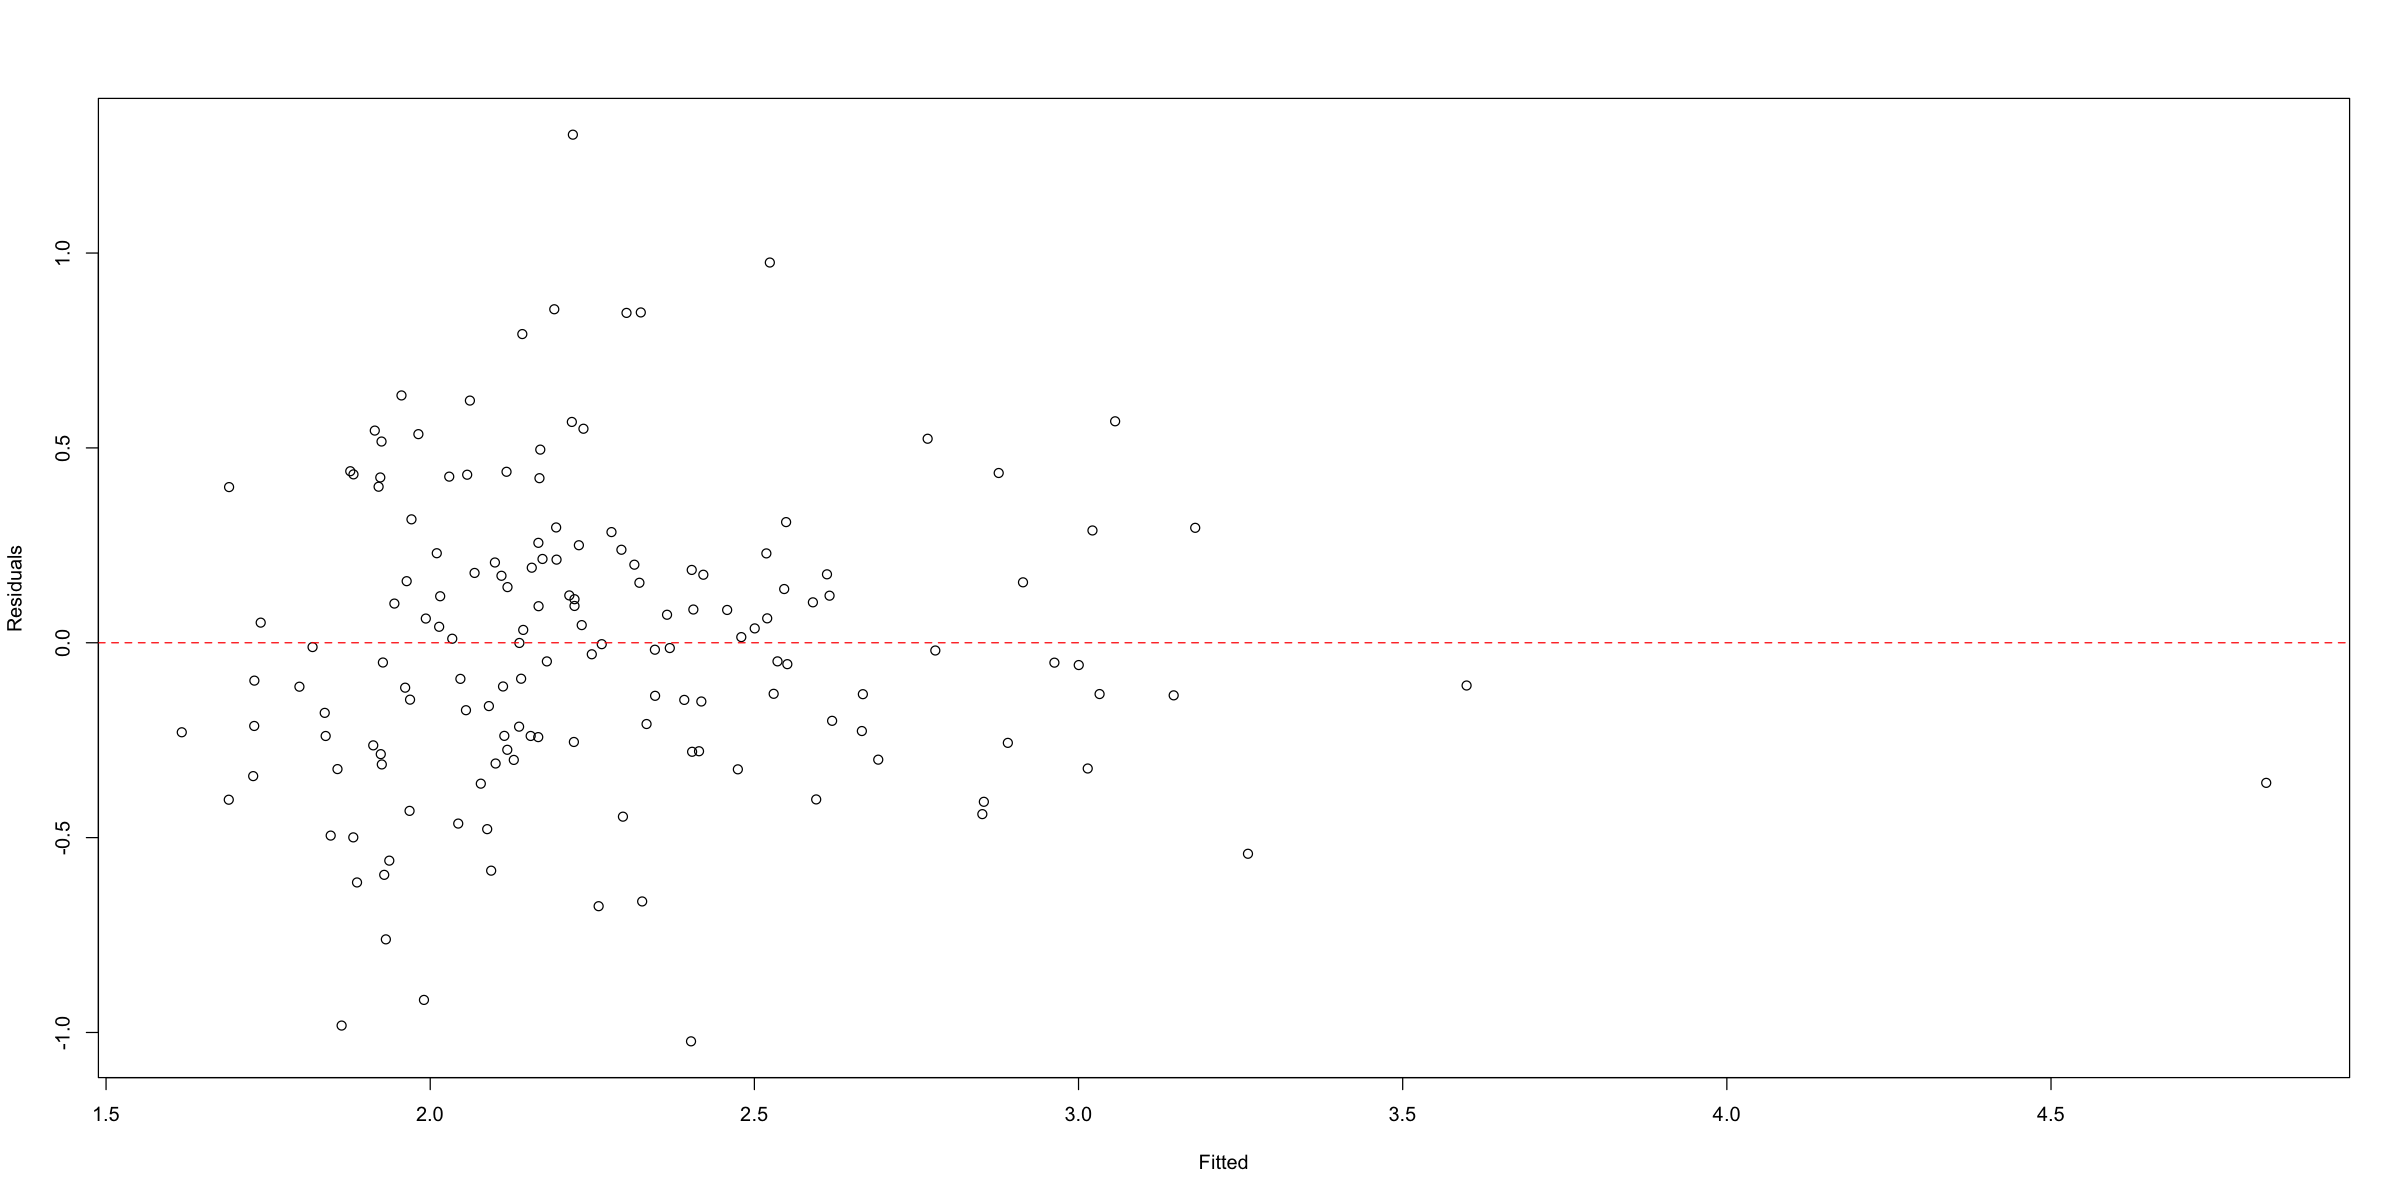

In [31]:
plot(fitted(m6_lmod),residuals(m6_lmod),xlab="Fitted",ylab="Residuals")
abline(h = 0, col = "red", lty = 2)


	Shapiro-Wilk normality test

data:  residuals(logy_lmod)
W = 0.95638, p-value = 8.268e-05


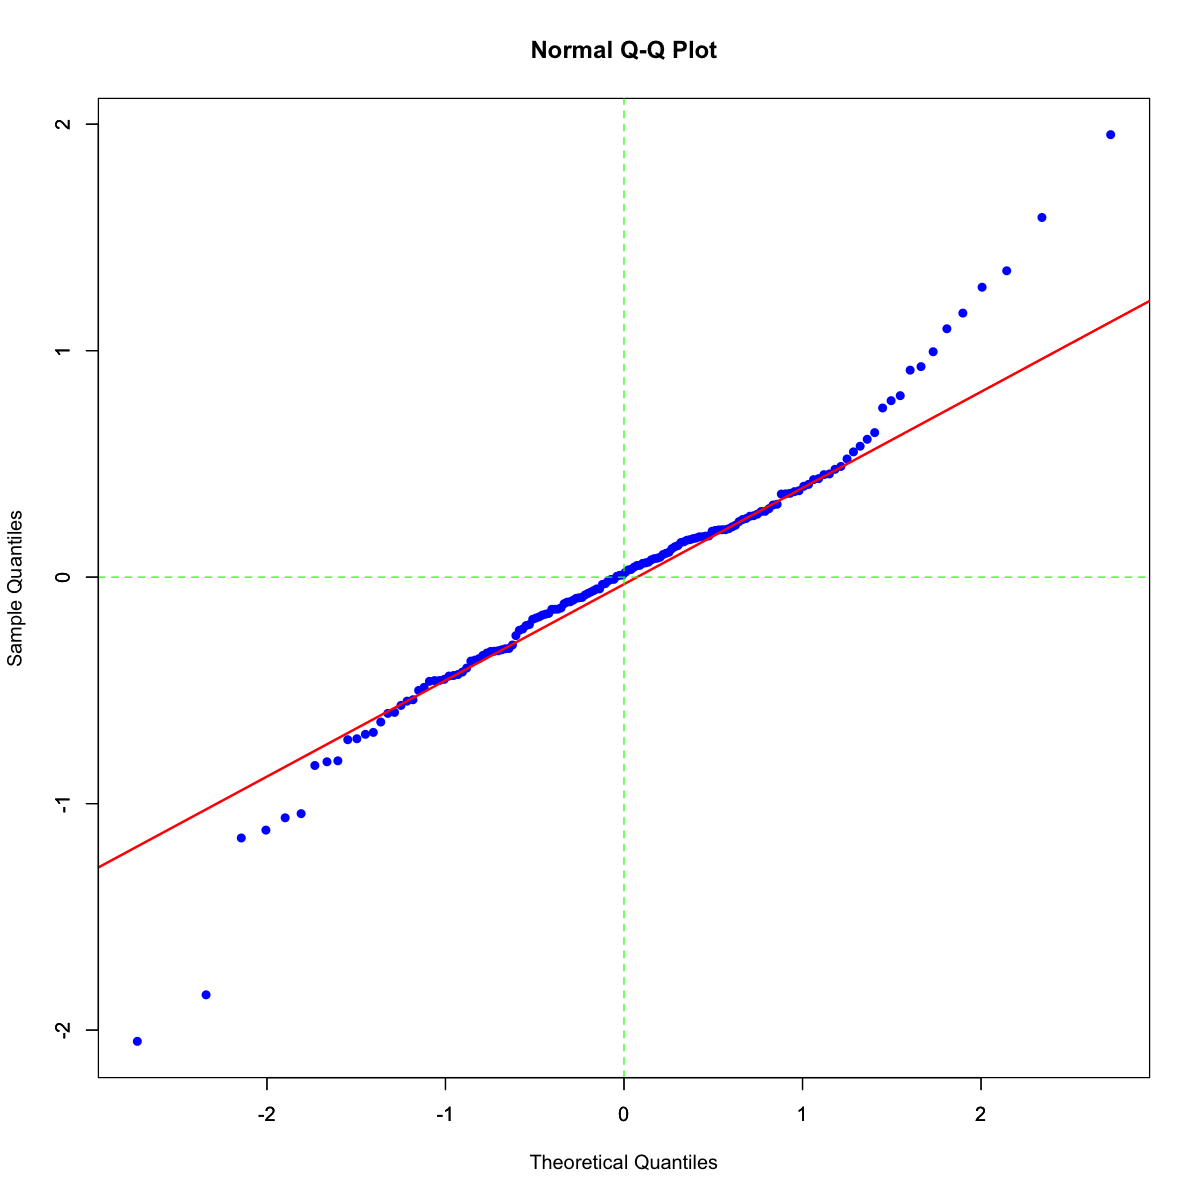

In [32]:
## Normality

options(
  repr.plot.width = 10,    # Width of the plot
  repr.plot.height = 10   # Height of the plot
)
# Extract standardized residuals from the model
residuals <- residuals(logy_lmod)

# Create a QQ plot
qqnorm(residuals, col = "blue", pch = 16)
qqline(residuals, col = "red",lwd=2)

# Add labels and title

xlabel <- expression("Theoretical Quantiles")
ylabel <- expression("Standardized Residuals")
xlabel <- bquote(.(xlabel))
ylabel <- bquote(.(ylabel))
abline(h = 0, col = "green", lty = 2)
abline(v = 0, col = "green", lty = 2)
axis(1, col = "black", lwd = 1, col.ticks = "black")
axis(2, col = "black", lwd = 1, col.ticks = "black")
shapiro.test(residuals(logy_lmod))


	Shapiro-Wilk normality test

data:  residuals(logy_73_lmod)
W = 0.95271, p-value = 4.137e-05


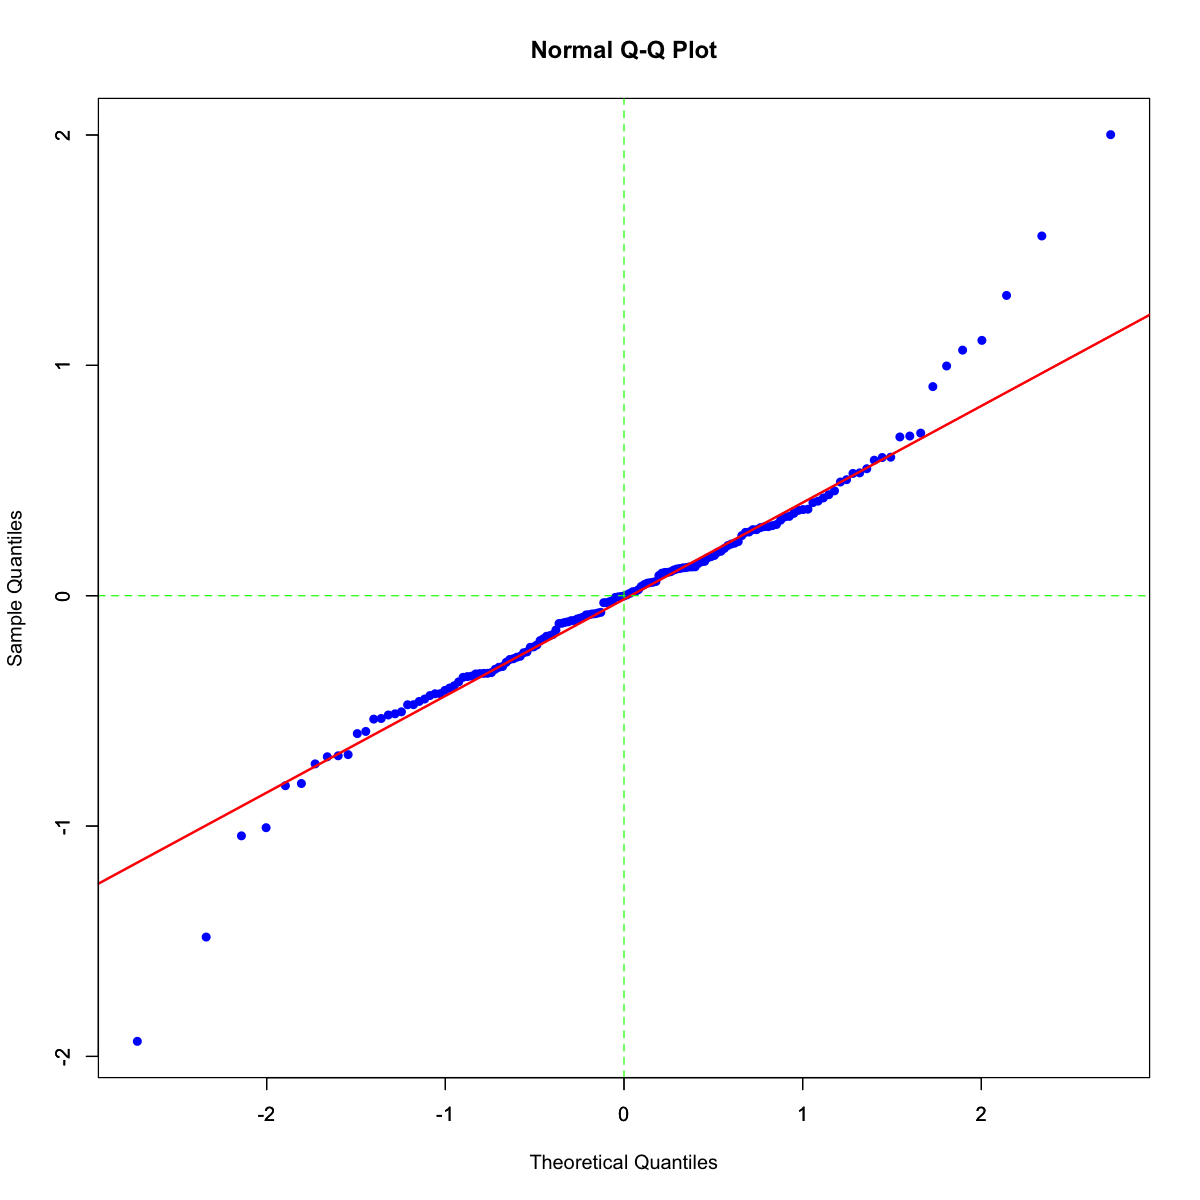

In [33]:
## Normality

options(
  repr.plot.width = 10,    # Width of the plot
  repr.plot.height = 10   # Height of the plot
)
# Extract standardized residuals from the model
residuals <- residuals(logy_73_lmod)

# Create a QQ plot
qqnorm(residuals, col = "blue", pch = 16)
qqline(residuals, col = "red",lwd=2)

# Add labels and title

xlabel <- expression("Theoretical Quantiles")
ylabel <- expression("Standardized Residuals")
xlabel <- bquote(.(xlabel))
ylabel <- bquote(.(ylabel))
abline(h = 0, col = "green", lty = 2)
abline(v = 0, col = "green", lty = 2)
axis(1, col = "black", lwd = 1, col.ticks = "black")
axis(2, col = "black", lwd = 1, col.ticks = "black")
shapiro.test(residuals(logy_73_lmod))


	Shapiro-Wilk normality test

data:  residuals(logy_73_lmod)
W = 0.95271, p-value = 4.137e-05


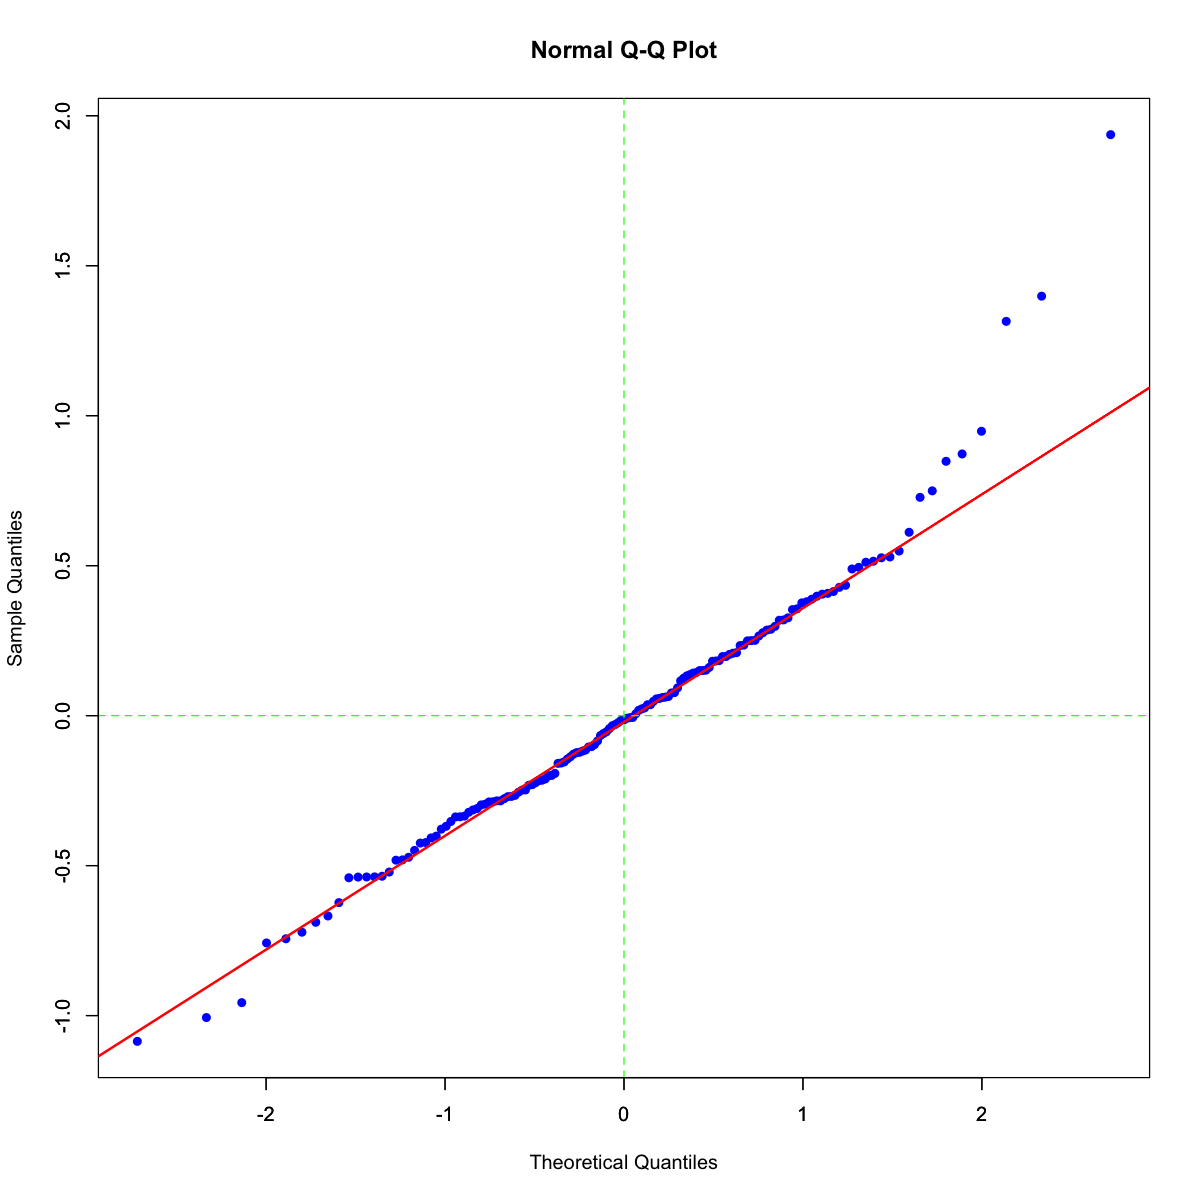

In [34]:
## Normality

options(
  repr.plot.width = 10,    # Width of the plot
  repr.plot.height = 10   # Height of the plot
)
# Extract standardized residuals from the model
residuals <- residuals(logy_73_14_17_lmod)

# Create a QQ plot
qqnorm(residuals, col = "blue", pch = 16)
qqline(residuals, col = "red",lwd=2)

# Add labels and title

xlabel <- expression("Theoretical Quantiles")
ylabel <- expression("Standardized Residuals")
xlabel <- bquote(.(xlabel))
ylabel <- bquote(.(ylabel))
abline(h = 0, col = "green", lty = 2)
abline(v = 0, col = "green", lty = 2)
axis(1, col = "black", lwd = 1, col.ticks = "black")
axis(2, col = "black", lwd = 1, col.ticks = "black")
shapiro.test(residuals(logy_73_lmod))


	Shapiro-Wilk normality test

data:  residuals(m5_lmod)
W = 0.98134, p-value = 0.03721


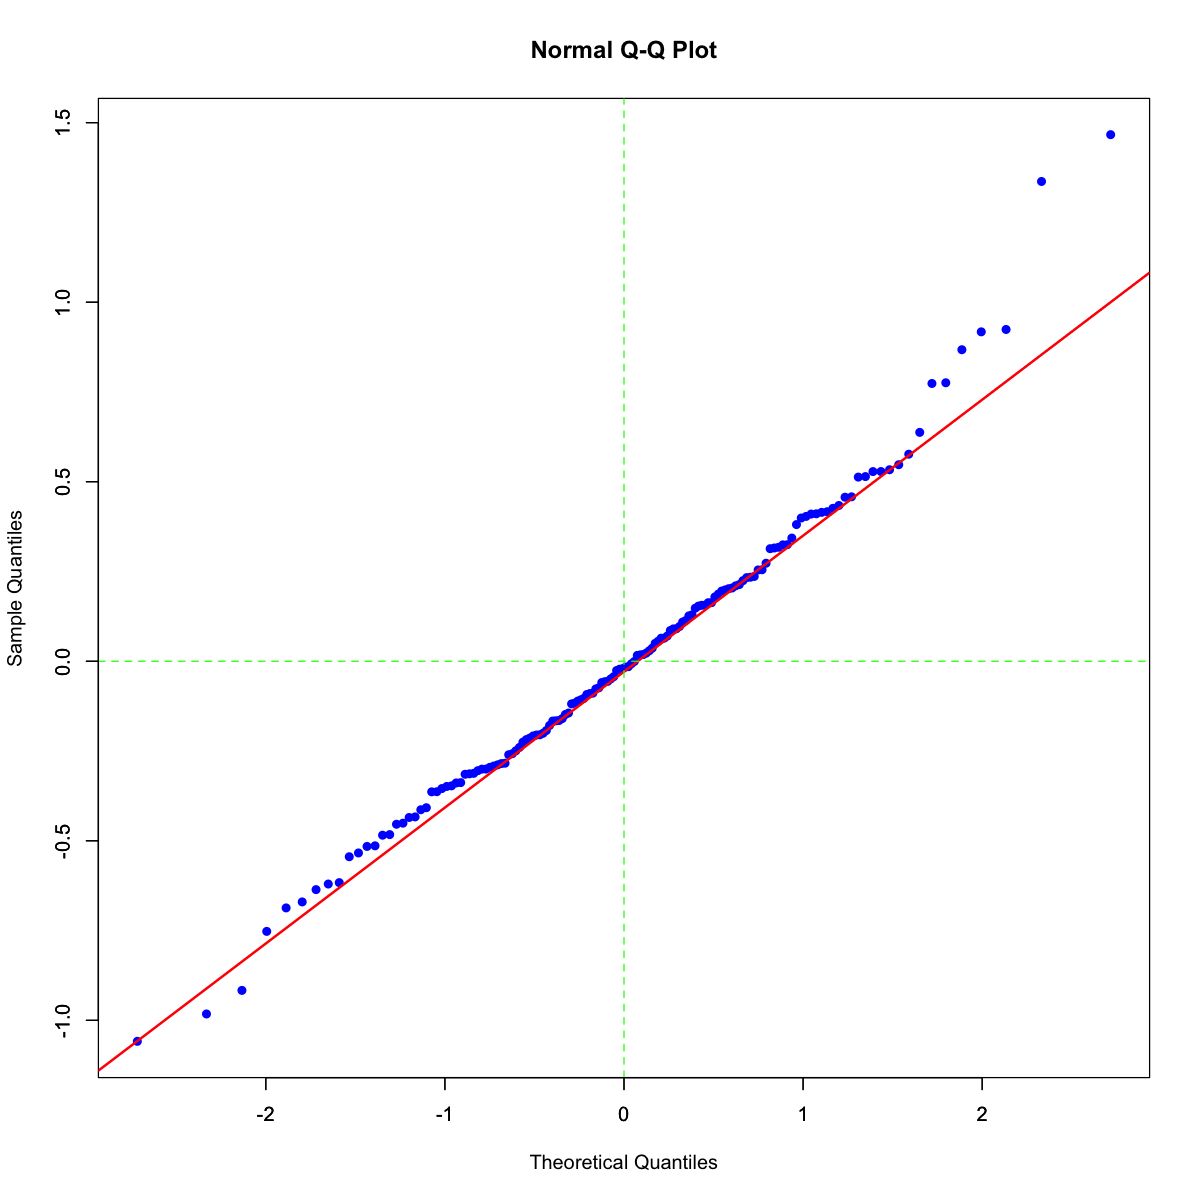

In [35]:
## Normality

options(
  repr.plot.width = 10,    # Width of the plot
  repr.plot.height = 10   # Height of the plot
)
# Extract standardized residuals from the model
residuals <- residuals(m5_lmod)

# Create a QQ plot
qqnorm(residuals, col = "blue", pch = 16)
qqline(residuals, col = "red",lwd=2)

# Add labels and title

xlabel <- expression("Theoretical Quantiles")
ylabel <- expression("Standardized Residuals")
xlabel <- bquote(.(xlabel))
ylabel <- bquote(.(ylabel))
abline(h = 0, col = "green", lty = 2)
abline(v = 0, col = "green", lty = 2)
axis(1, col = "black", lwd = 1, col.ticks = "black")
axis(2, col = "black", lwd = 1, col.ticks = "black")
shapiro.test(residuals(m5_lmod))


	Shapiro-Wilk normality test

data:  residuals(m6_lmod)
W = 0.99106, p-value = 0.4588


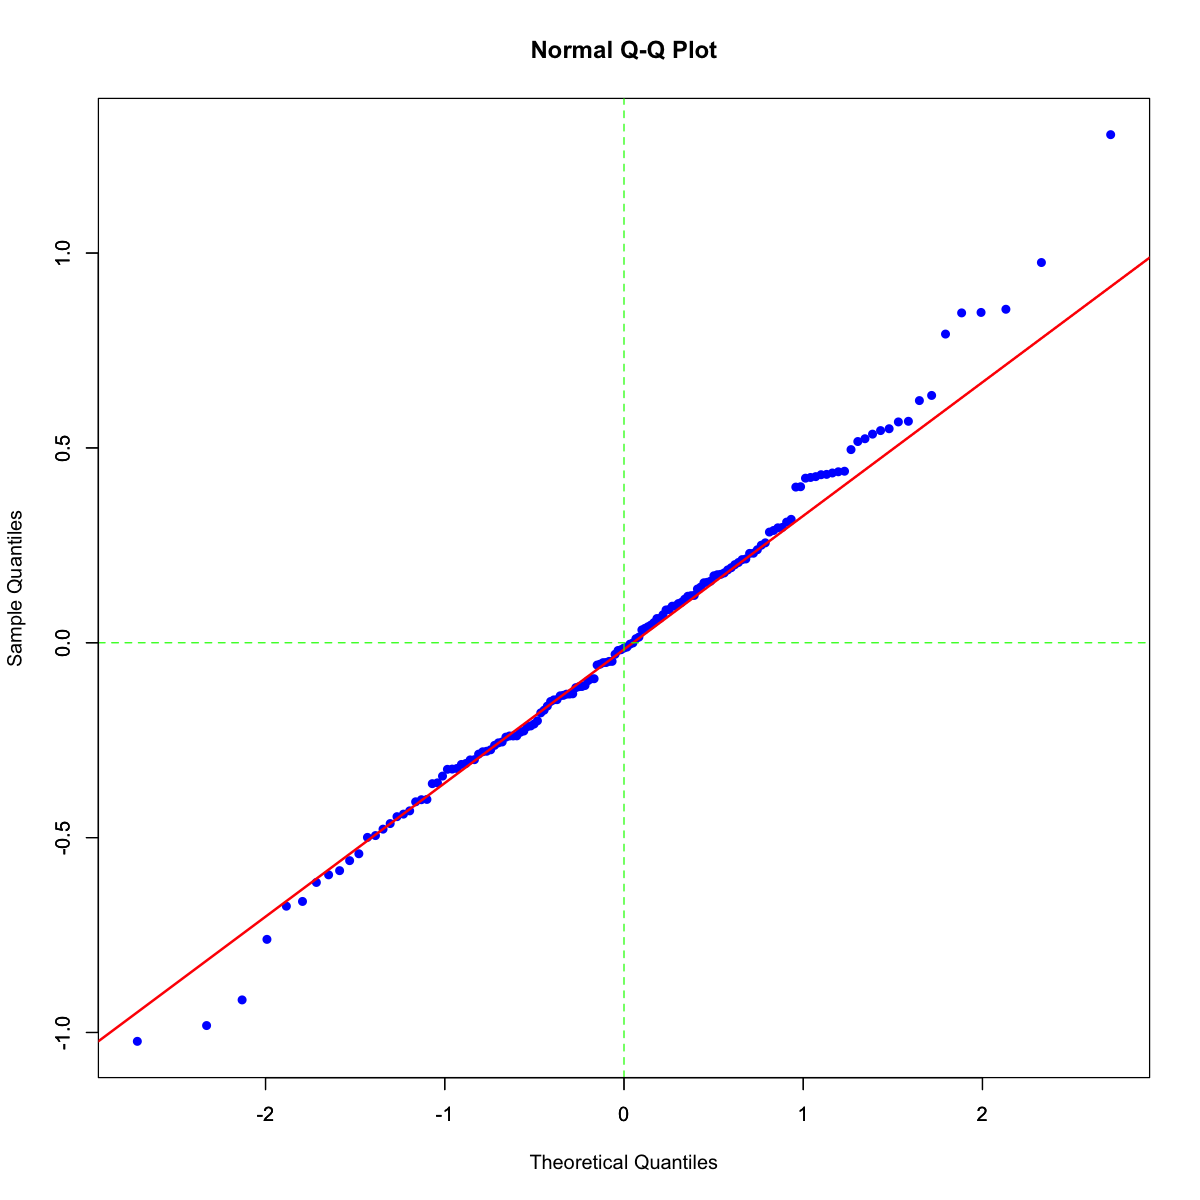

In [36]:
## Normality

options(
  repr.plot.width = 10,    # Width of the plot
  repr.plot.height = 10   # Height of the plot
)
# Extract standardized residuals from the model
residuals <- residuals(m6_lmod)

# Create a QQ plot
qqnorm(residuals, col = "blue", pch = 16)
qqline(residuals, col = "red",lwd=2)

# Add labels and title

xlabel <- expression("Theoretical Quantiles")
ylabel <- expression("Standardized Residuals")
xlabel <- bquote(.(xlabel))
ylabel <- bquote(.(ylabel))
abline(h = 0, col = "green", lty = 2)
abline(v = 0, col = "green", lty = 2)
axis(1, col = "black", lwd = 1, col.ticks = "black")
axis(2, col = "black", lwd = 1, col.ticks = "black")
shapiro.test(residuals(m6_lmod))

In [37]:
## Corellation b/w errors
dwtest(logy_73_lmod)


	Durbin-Watson test

data:  logy_73_lmod
DW = 1.6557, p-value = 0.009587
alternative hypothesis: true autocorrelation is greater than 0


In [38]:
dwtest(logy_73_14_17_lmod)


	Durbin-Watson test

data:  logy_73_14_17_lmod
DW = 1.675, p-value = 0.01299
alternative hypothesis: true autocorrelation is greater than 0


In [39]:
dwtest(m5_lmod)


	Durbin-Watson test

data:  m5_lmod
DW = 1.8576, p-value = 0.1395
alternative hypothesis: true autocorrelation is greater than 0


In [40]:
dwtest(m6_lmod)


	Durbin-Watson test

data:  m6_lmod
DW = 1.7952, p-value = 0.07135
alternative hypothesis: true autocorrelation is greater than 0


## Unusual Observations

Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <99>”


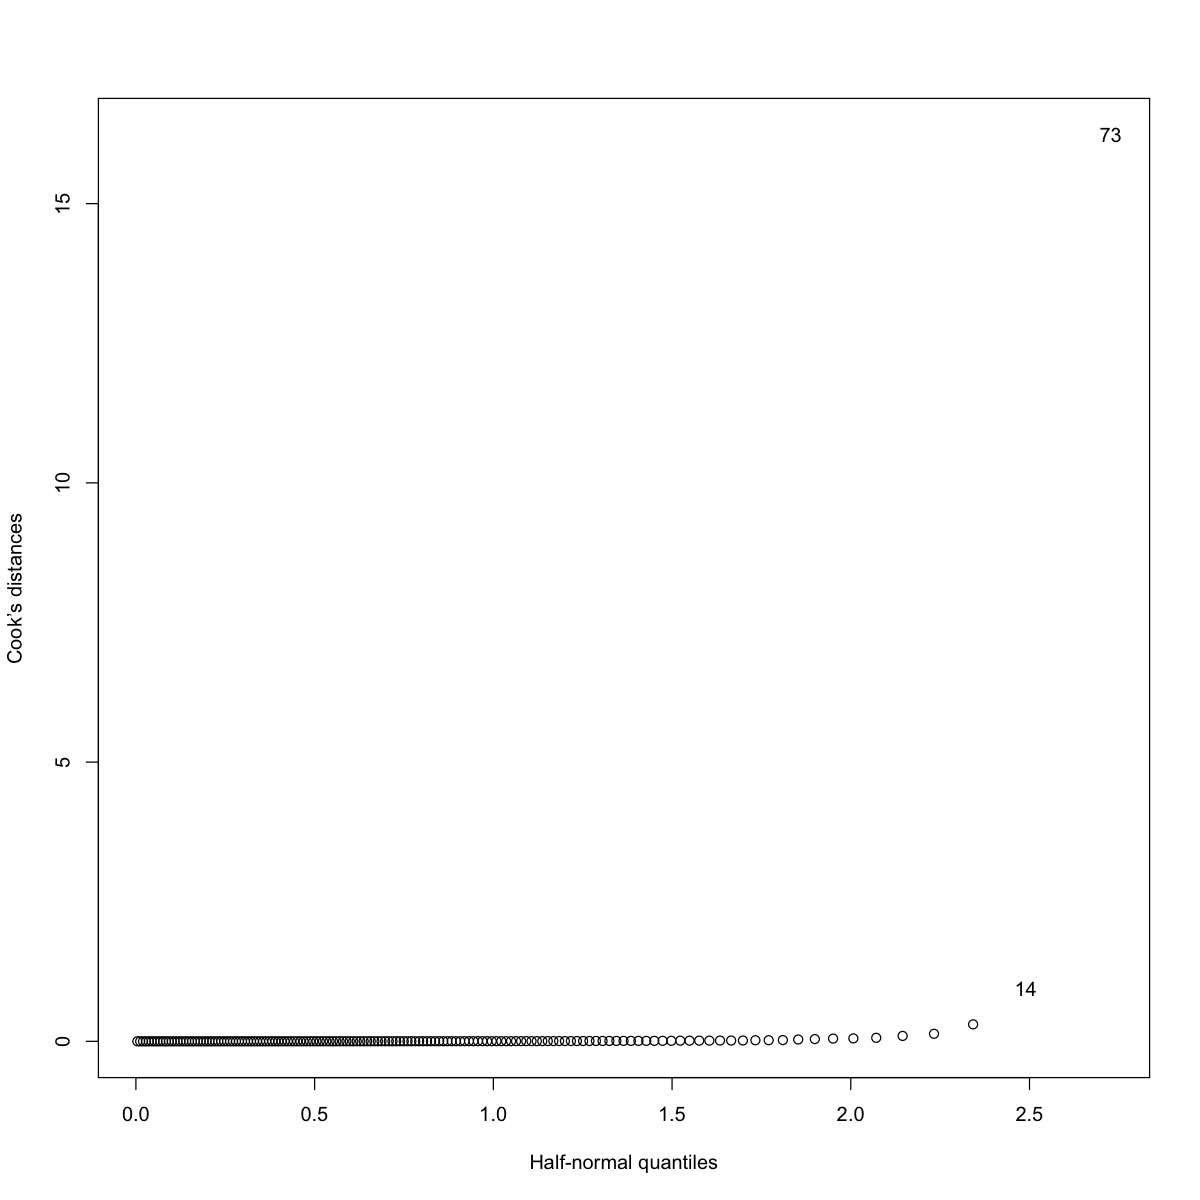

In [41]:
## Influential Points
cook <- cooks.distance(logy_lmod)
halfnorm(cook,ylab="Cook’s distances")

Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <99>”


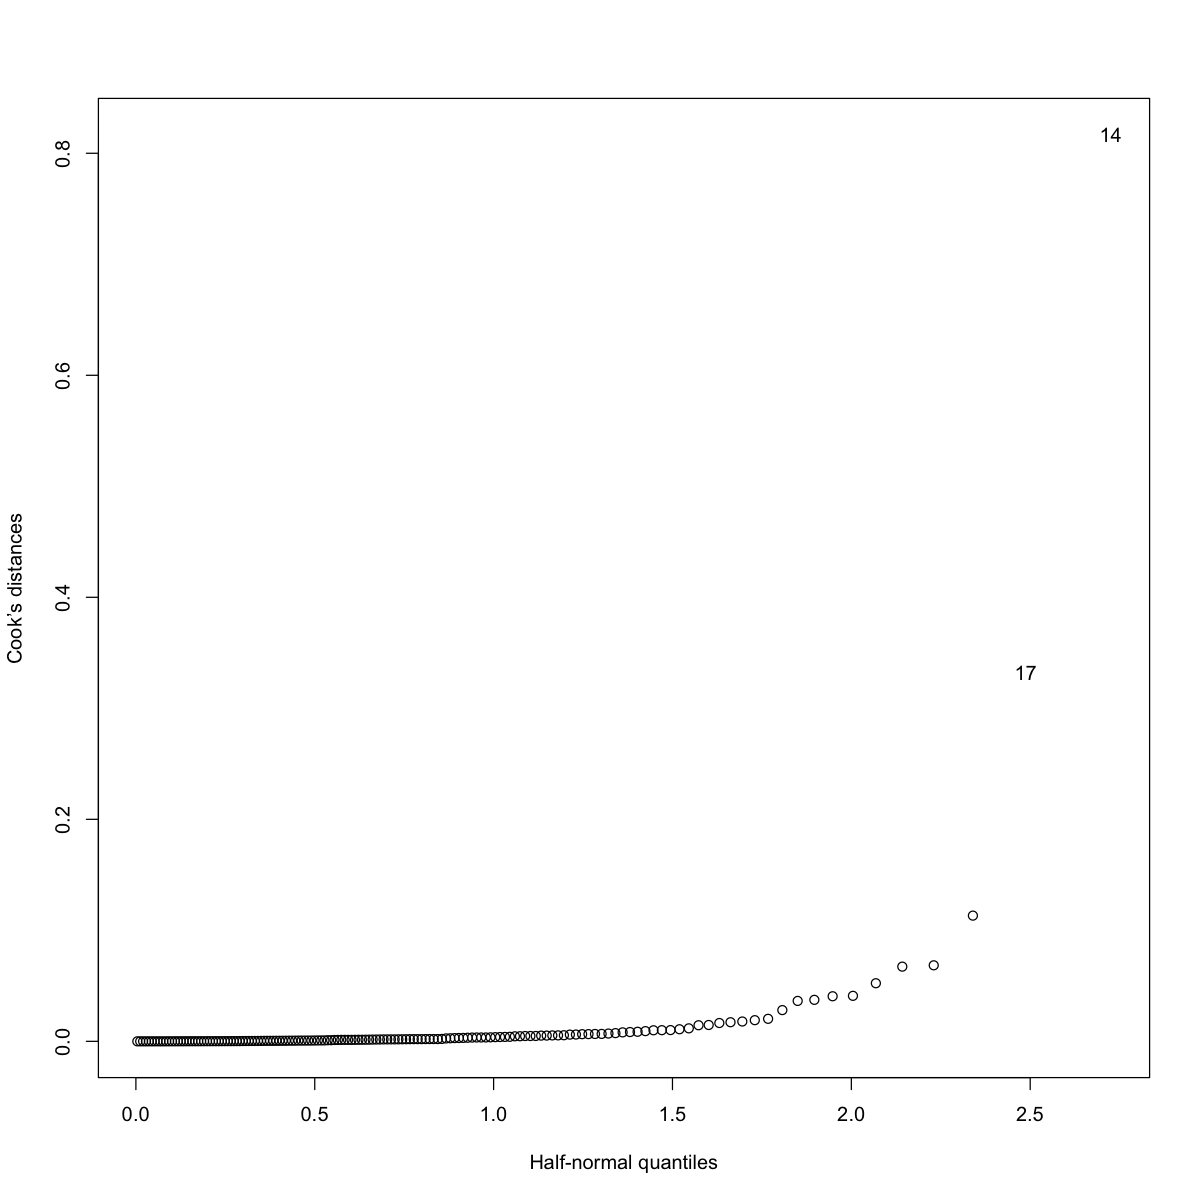

In [42]:
## Influential Points
cook <- cooks.distance(logy_73_lmod)
halfnorm(cook,ylab="Cook’s distances")

Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <99>”


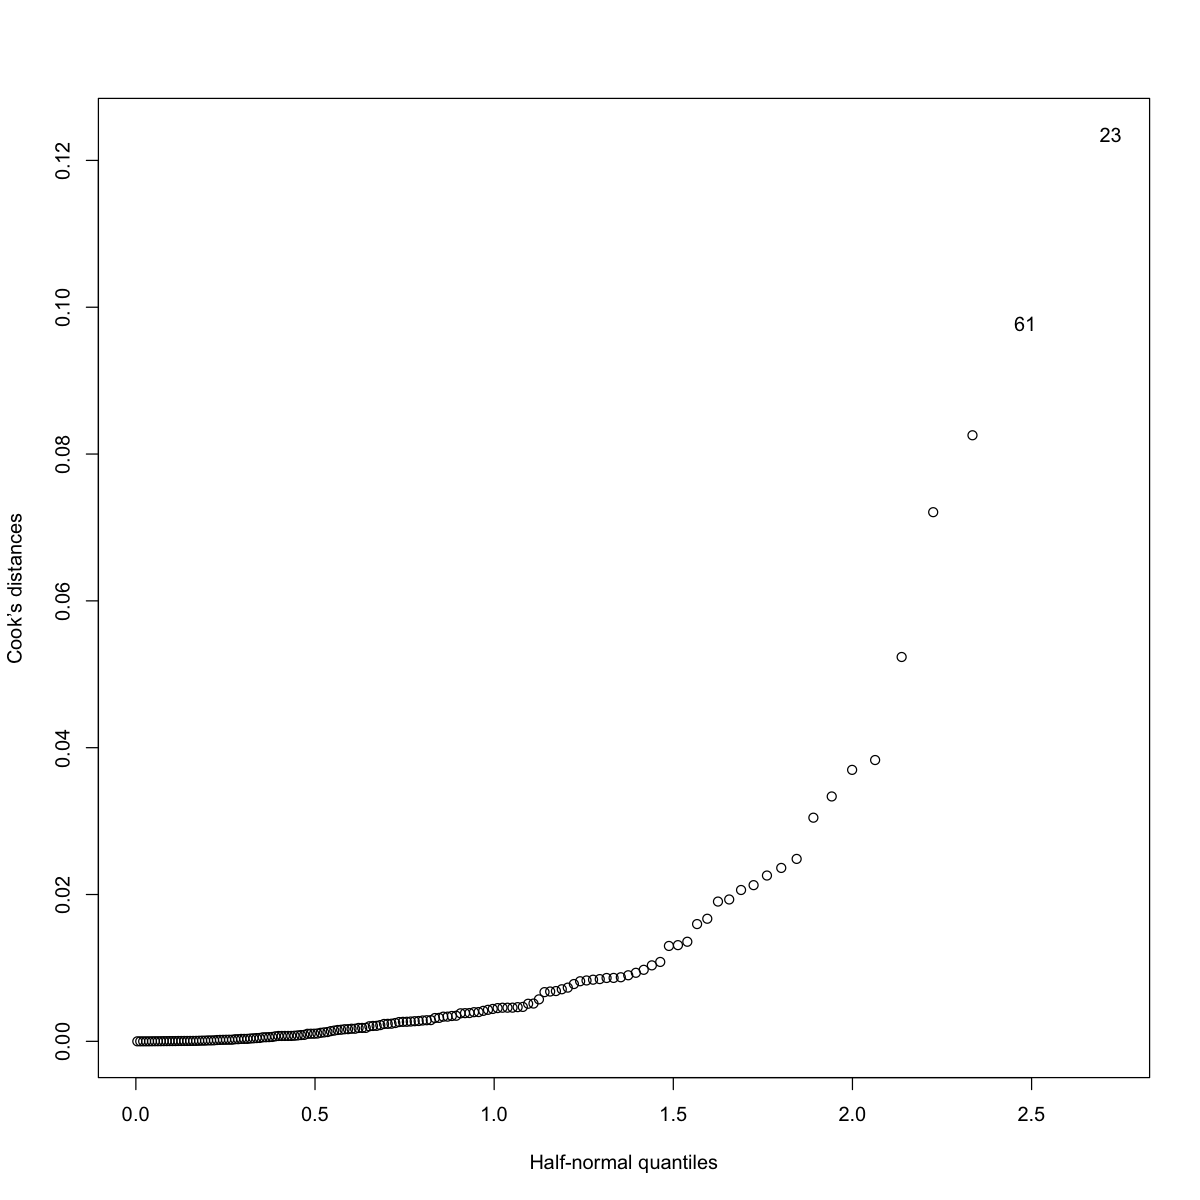

In [43]:
## Influential Points
cook <- cooks.distance(logy_73_14_17_lmod)
halfnorm(cook,ylab="Cook’s distances")

Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in title(...):
“conversion failure on 'Cook’s distances' in 'mbcsToSbcs': dot substituted for <99>”


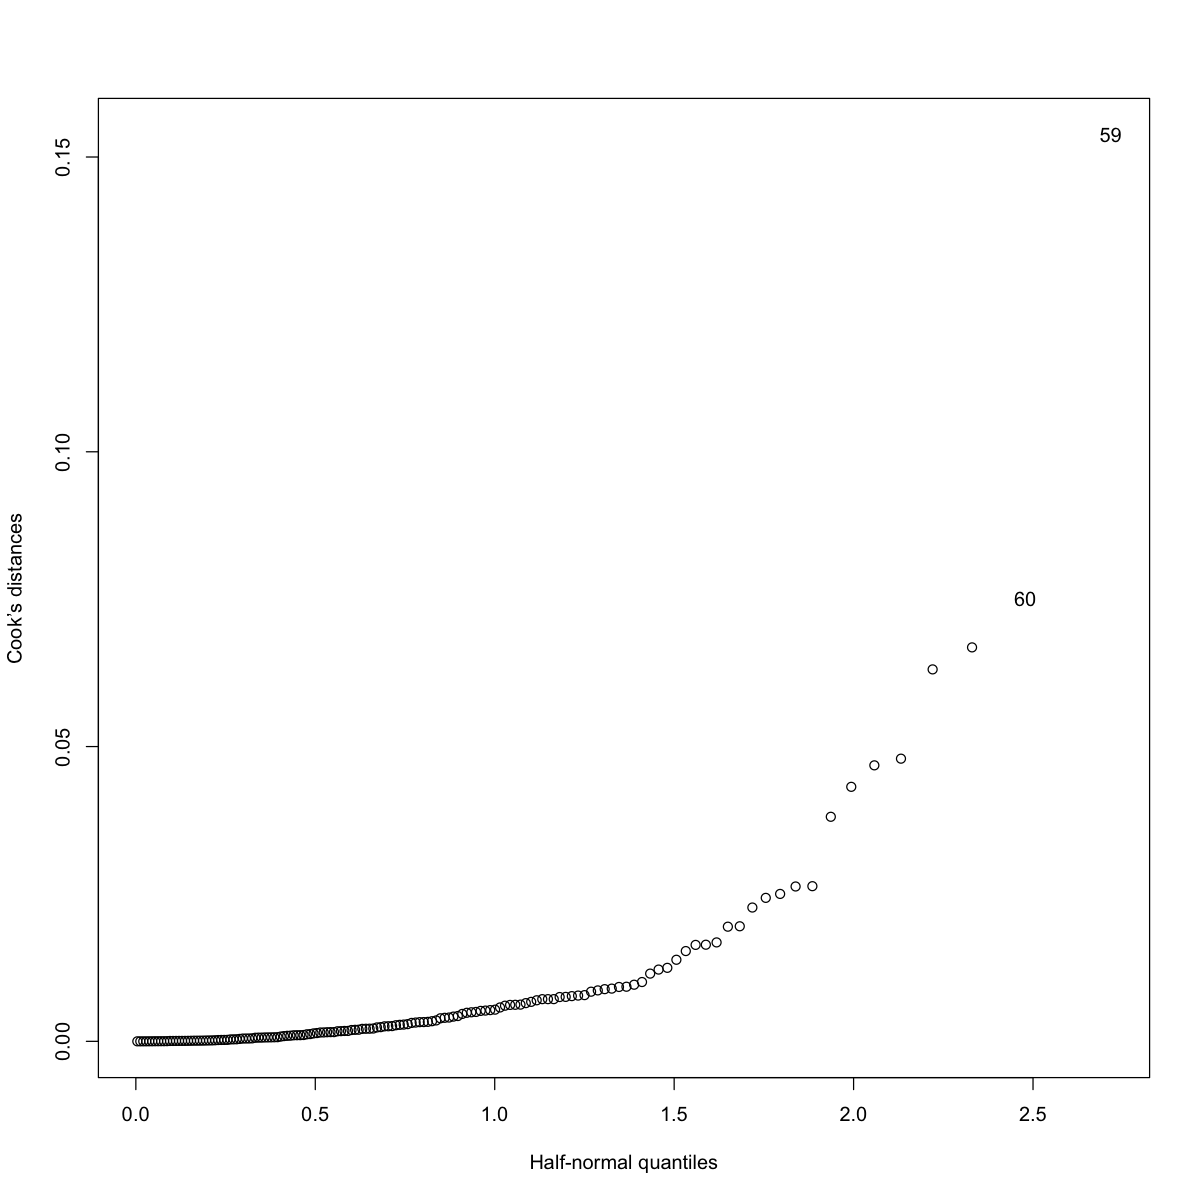

In [44]:
## Influential Points
cook <- cooks.distance(m6_lmod)
halfnorm(cook,ylab="Cook’s distances")

In [45]:
## Outliers
jackres <- rstudent(logy_73_14_17_lmod)
head(jackres[order(abs(jackres),decreasing=T)])
abs( qt(.025/153, 153 - 7 - 1) )

22        23        60        95       132        62 
 4.765045  3.415766  3.102976 -2.549483 -2.394136  2.290444

[1] 3.681136

In [46]:
jackres <- rstudent(m5_lmod)
head(jackres[order(abs(jackres),decreasing=T)])
abs( qt(.025/152, 152 - 7 - 1) )

22        59        94       131        61        54 
 3.886960  3.404891 -2.671210 -2.510606  2.398108  2.342091

[1] 3.679931

In [47]:
jackres <- rstudent(m6_lmod)
head(jackres[order(abs(jackres),decreasing=T)])
abs( qt(.025/152, 152 - 7 - 1) )

58        93       130        53        49        60 
 3.489418 -2.707175 -2.636486  2.624639 -2.400493  2.305086

[1] 3.679931

In [48]:
## Leverage Points
hatv <- hatvalues(m6_lmod)
which( hatv > 2*8/nrow(m6)) 

17  18  19  21  28  59  62  64  69  71 133 
 17  18  19  21  28  59  62  64  69  71 133

## Model Selection

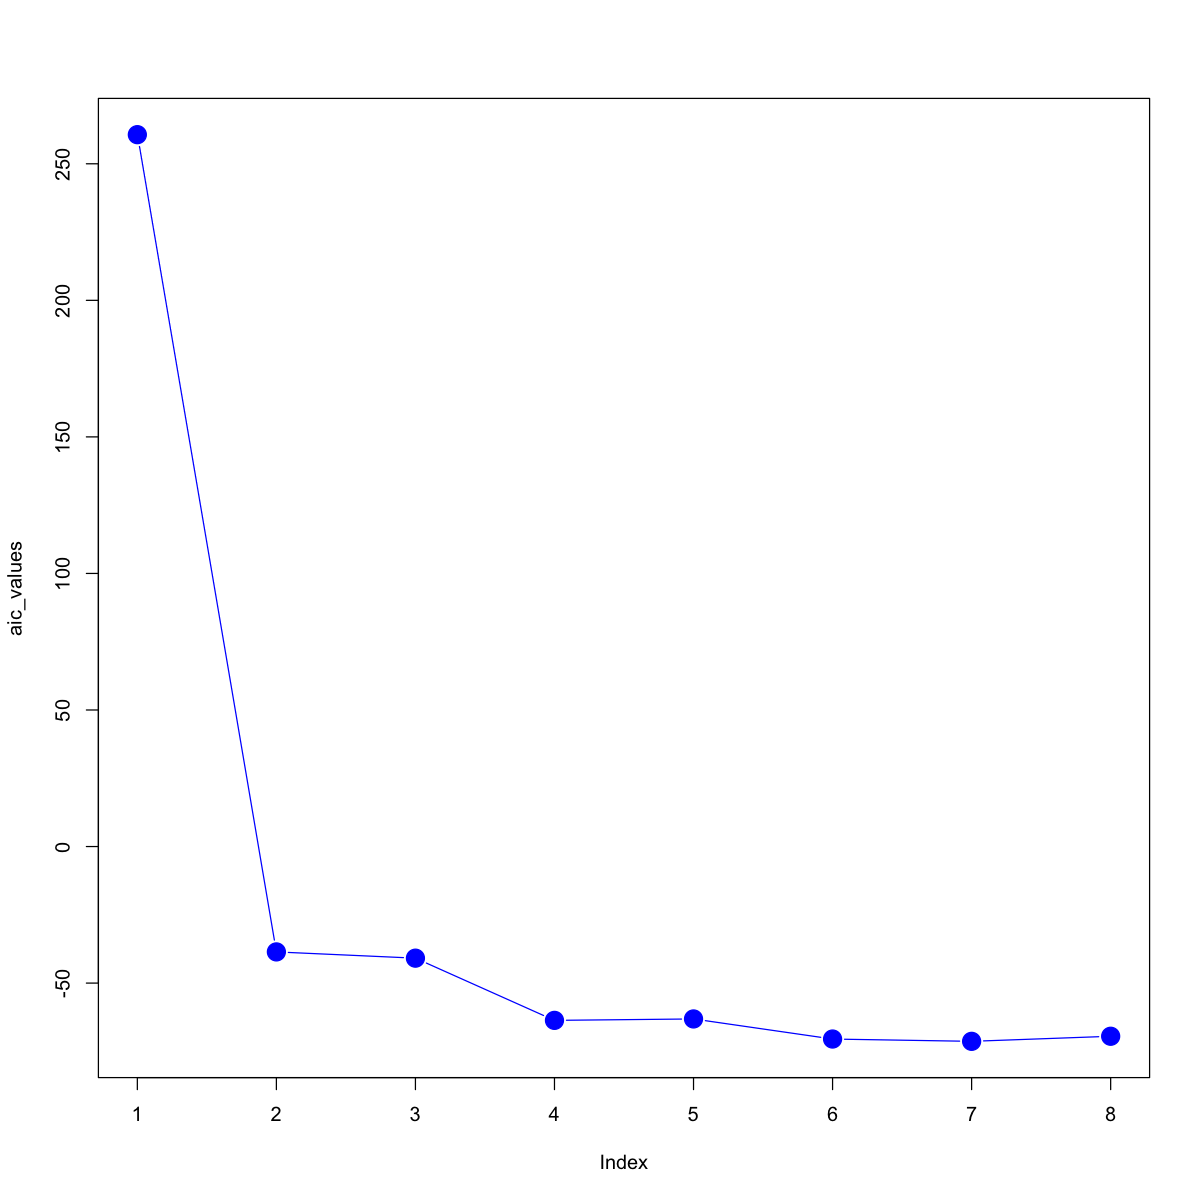

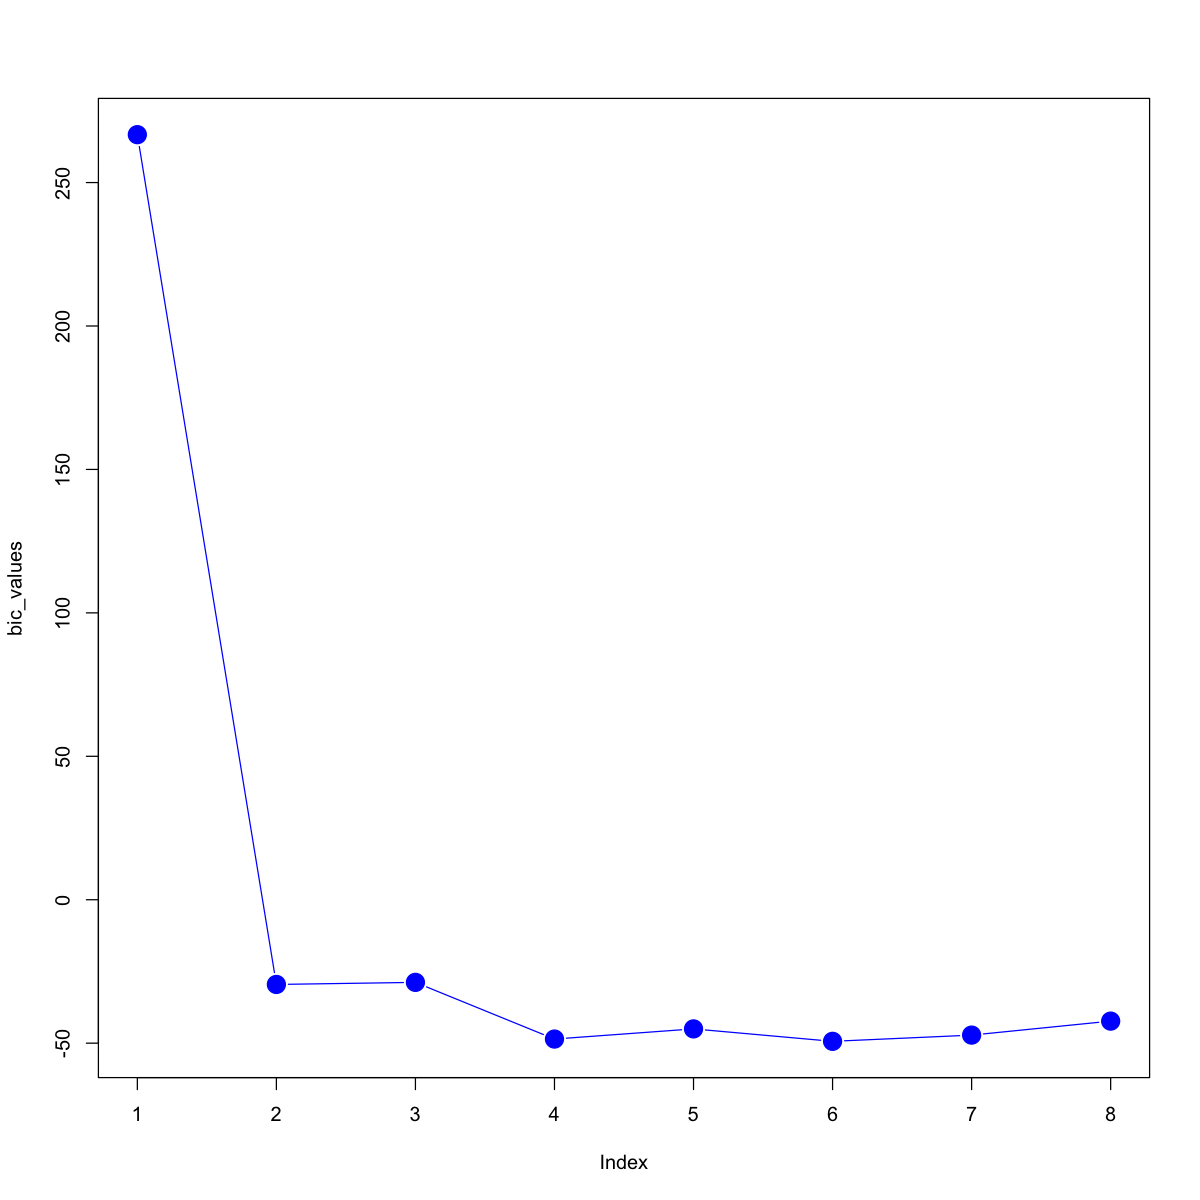

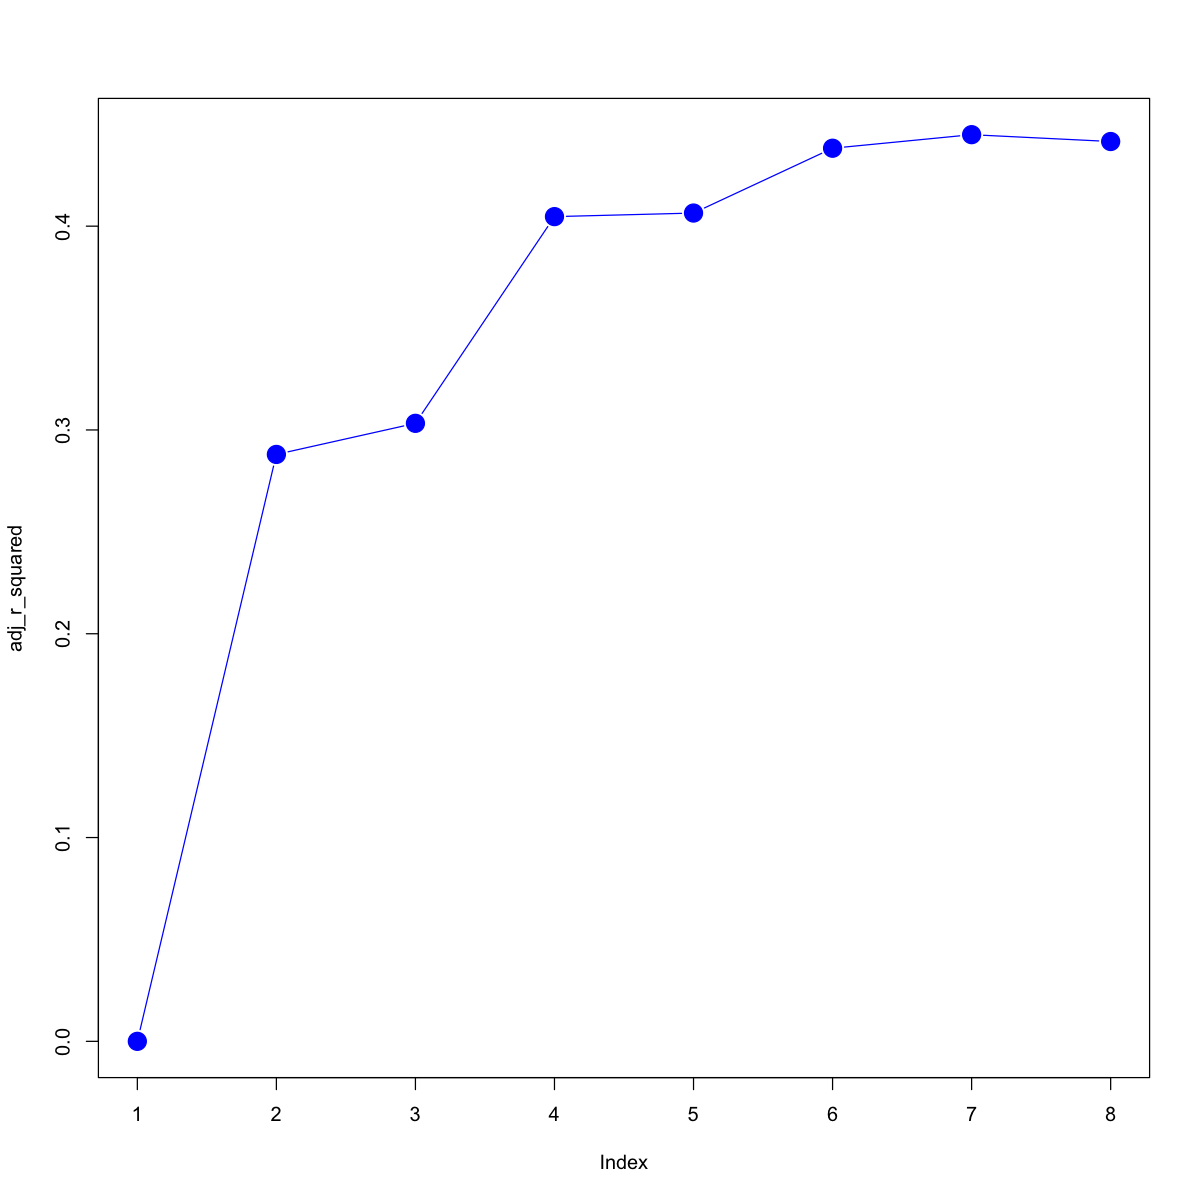

In [49]:
# Assuming 'data_removed_73_14_16' is your dataset
# Assuming 'log(totalcrimerate + 0.1)' is your response variable

# Initial model without any predictors
base_model <- lm(totalcrimerate ~ 1, data = m6)

# List of predictors
predictors <- c("cyclerate", "sharesingleparent", "unemprate", "pop", "resmobility", "povertyrate", "medinc")

# Initialize a list to store AIC values
aic_values <- vector("numeric", length = length(predictors) + 1)
bic_values <- vector("numeric", length = length(predictors) + 1)
adj_r_squared <- vector("numeric", length = length(predictors) + 1)

# Compute AIC for the initial model
aic_values[1] <- AIC(base_model)
bic_values[1] <- BIC(base_model)
adj_r_squared[1] <- summary(base_model)$adj.r.squared

# Loop to add each predictor one at a time
for (i in seq_along(predictors)) {
  # Add the current predictor to the model
  formula <- reformulate(c("1", predictors[1:i]), response = "log(totalcrimerate + 0.1)")
  current_model <- lm(formula, data = m6)
  
  # Compute AIC for the current model
  aic_values[i + 1] <- AIC(current_model)
  bic_values[i + 1] <- BIC(current_model)
    adj_r_squared[i+1] <- summary(current_model)$adj.r.squared
}




plot(aic_values )
lines(aic_values,pch = 19, cex = 2, type = 'b', col = 'blue')

plot(bic_values )
lines(bic_values,pch = 19, cex = 2, type = 'b', col = 'blue')

plot(adj_r_squared )
lines(adj_r_squared,pch = 19, cex = 2, type = 'b', col = 'blue')

In [50]:
# Assuming 'data_removed_73_14_16' is your dataset
# Assuming 'log(totalcrimerate + 0.1)' is your response variable

# Initial model without any predictors
base_model <- lm(totalcrimerate ~ 1, data = m6)
print(summary(base_model))
cat("------------------------------------------------------------------------------------",end='\n')

# List of predictors
predictors <- c("cyclerate", "sharesingleparent", "unemprate", "pop", "resmobility", "povertyrate", "medinc")

# Initialize a list to store AIC values
aic_values <- vector("numeric", length = length(predictors) + 1)
bic_values <- vector("numeric", length = length(predictors) + 1)
adj_r_squared <- vector("numeric", length = length(predictors) + 1)

# Compute AIC for the initial model
aic_values[1] <- AIC(base_model)
bic_values[1] <- BIC(base_model)
adj_r_squared[1] <- summary(base_model)$adj.r.squared

# Loop to add each predictor one at a time
for (i in seq_along(predictors)) {
  # Add the current predictor to the model
  formula <- reformulate(c("1", predictors[1:i]), response = "totalcrimerate")
    print(formula)
  current_model <- lm(formula, data = m6)
  print(summary(current_model))
    cat("------------------------------------------------------------------------------------",end='\n')
  # Compute AIC for the current model
  aic_values[i + 1] <- AIC(current_model)
  bic_values[i + 1] <- BIC(current_model)
    adj_r_squared[i+1] <- summary(current_model)$adj.r.squared
}


Call:
lm(formula = totalcrimerate ~ 1, data = m6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39258 -0.39446  0.04003  0.28633  2.19879 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.27369    0.04622    49.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5679 on 150 degrees of freedom

------------------------------------------------------------------------------------ 
totalcrimerate ~ 1 + cyclerate

Call:
lm(formula = formula, data = m6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08742 -0.35039 -0.03793  0.26113  1.42679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.91603    0.05731  33.432  < 2e-16 ***
cyclerate    0.40242    0.04804   8.378  3.7e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4698 on 149 degrees of freedom
Multiple R-squared:  0.3202,	Adjuste

In [51]:
best_model <- lm(totalcrimerate ~ cyclerate + sharesingleparent + unemprate + resmobility + pop , data = m6)
summary(best_model)


Call:
lm(formula = totalcrimerate ~ cyclerate + sharesingleparent + 
    unemprate + resmobility + pop, data = m6)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02278 -0.26258 -0.01283  0.25564  1.32604 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.541e+00  1.847e-01   8.344 5.14e-14 ***
cyclerate          4.025e-01  6.362e-02   6.326 2.94e-09 ***
sharesingleparent -1.245e+00  5.152e-01  -2.417  0.01688 *  
unemprate          4.238e+00  8.328e-01   5.090 1.10e-06 ***
resmobility        8.022e-01  2.927e-01   2.740  0.00691 ** 
pop               -4.585e-05  2.130e-05  -2.153  0.03299 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3966 on 145 degrees of freedom
Multiple R-squared:  0.5287,	Adjusted R-squared:  0.5125 
F-statistic: 32.54 on 5 and 145 DF,  p-value: < 2.2e-16
